# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['LINK/AUD']['symbol']
# crypto_details

'LINK/AUD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [5]:
# Fetch daily candlestick bar data from `LINK/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620640800000, 50.91595, 51.11064, 50.13834, 50.19934, 482.01348128]

In [6]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume
0  1620633600000  51.53805  51.71618  50.80629  51.52213  2648.774972
1  1620637200000  51.41018  51.82003  50.58389  50.85370   772.559592
2  1620640800000  50.91595  51.11064  50.13834  50.19934   482.013481
3  1620644400000  50.05272  50.97968  49.30000  50.45710  1336.391559
4  1620648000000  50.43851  50.75521  50.15697  50.42942  1082.353878

'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [7]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume  \
0  1620633600000  51.53805  51.71618  50.80629  51.52213  2648.774972   
1  1620637200000  51.41018  51.82003  50.58389  50.85370   772.559592   
2  1620640800000  50.91595  51.11064  50.13834  50.19934   482.013481   
3  1620644400000  50.05272  50.97968  49.30000  50.45710  1336.391559   
4  1620648000000  50.43851  50.75521  50.15697  50.42942  1082.353878   

                 date  
0 2021-05-10 08:00:00  
1 2021-05-10 09:00:00  
2 2021-05-10 10:00:00  
3 2021-05-10 11:00:00  
4 2021-05-10 12:00:00

'_________________________'

'historical_prices_df shape: (720, 7)'

In [8]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-10 08:00:00  1620633600000  51.53805  51.71618  50.80629  51.52213   
2021-05-10 09:00:00  1620637200000  51.41018  51.82003  50.58389  50.85370   
2021-05-10 10:00:00  1620640800000  50.91595  51.11064  50.13834  50.19934   
2021-05-10 11:00:00  1620644400000  50.05272  50.97968  49.30000  50.45710   
2021-05-10 12:00:00  1620648000000  50.43851  50.75521  50.15697  50.42942   
...                            ...       ...       ...       ...       ...   
2021-06-09 03:00:00  1623207600000  22.95701  23.15923  22.78507  22.94313   
2021-06-09 04:00:00  1623211200000  23.08310  23.09007  22.49118  22.98448   
2021-06-09 05:00:00  1623214800000  23.10394  23.37870  23.10394  23.36183   
2021-06-09 06:00:00  1623218400000  23.29185  24.21321  23.29185  24.17353   
2021-06-09 07:00:00  1623222000000  23.99911  24.23199  23.88462  23.92065   

                          volume                date  
date                                                  
2021-05-10 08:00:00  2648.774972 2021-05-10 08:00:00  
2021-05-10 09:00:00   772.559592 2021-05-10 09:00:00  
2021-05-10 10:00:00   482.013481 2021-05-10 10:00:00  
2021-05-10 11:00:00  1336.391559 2021-05-10 11:00:00  
2021-05-10 12:00:00  1082.353878 2021-05-10 12:00:00  
...                          ...                 ...  
2021-06-09 03:00:00   956.768468 2021-06-09 03:00:00  
2021-06-09 04:00:00  1480.093942 2021-06-09 04:00:00  
2021-06-09 05:00:00   842.845377 2021-06-09 05:00:00  
2021-06-09 06:00:00  1495.274253 2021-06-09 06:00:00  
2021-06-09 07:00:00   330.101436 2021-06-09 07:00:00  

[720 rows x 7 columns]

### Plot Daily Returns

In [9]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

timestamp      open      high       low     close  \
date                                                                         
2021-05-10 09:00:00  1620637200000  51.41018  51.82003  50.58389  50.85370   
2021-05-10 10:00:00  1620640800000  50.91595  51.11064  50.13834  50.19934   
2021-05-10 11:00:00  1620644400000  50.05272  50.97968  49.30000  50.45710   
2021-05-10 12:00:00  1620648000000  50.43851  50.75521  50.15697  50.42942   
2021-05-10 13:00:00  1620651600000  50.20784  50.71584  49.69643  49.89203   
...                            ...       ...       ...       ...       ...   
2021-06-09 03:00:00  1623207600000  22.95701  23.15923  22.78507  22.94313   
2021-06-09 04:00:00  1623211200000  23.08310  23.09007  22.49118  22.98448   
2021-06-09 05:00:00  1623214800000  23.10394  23.37870  23.10394  23.36183   
2021-06-09 06:00:00  1623218400000  23.29185  24.21321  23.29185  24.17353   
2021-06-09 07:00:00  1623222000000  23.99911  24.23199  23.88462  23.92065   

                          volume                date  daily_return  
date                                                                
2021-05-10 09:00:00   772.559592 2021-05-10 09:00:00     -0.012974  
2021-05-10 10:00:00   482.013481 2021-05-10 10:00:00     -0.012868  
2021-05-10 11:00:00  1336.391559 2021-05-10 11:00:00      0.005135  
2021-05-10 12:00:00  1082.353878 2021-05-10 12:00:00     -0.000549  
2021-05-10 13:00:00   759.248805 2021-05-10 13:00:00     -0.010656  
...                          ...                 ...           ...  
2021-06-09 03:00:00   956.768468 2021-06-09 03:00:00      0.002575  
2021-06-09 04:00:00  1480.093942 2021-06-09 04:00:00      0.001802  
2021-06-09 05:00:00   842.845377 2021-06-09 05:00:00      0.016418  
2021-06-09 06:00:00  1495.274253 2021-06-09 06:00:00      0.034745  
2021-06-09 07:00:00   330.101436 2021-06-09 07:00:00     -0.010461  

[719 rows x 8 columns]

### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [10]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-10 09:00:00  1620637200000  51.41018  51.82003  50.58389  50.85370   
2021-05-10 10:00:00  1620640800000  50.91595  51.11064  50.13834  50.19934   
2021-05-10 11:00:00  1620644400000  50.05272  50.97968  49.30000  50.45710   
2021-05-10 12:00:00  1620648000000  50.43851  50.75521  50.15697  50.42942   
2021-05-10 13:00:00  1620651600000  50.20784  50.71584  49.69643  49.89203   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-10 09:00:00   772.559592 2021-05-10 09:00:00     -0.012974  50.853700   
2021-05-10 10:00:00   482.013481 2021-05-10 10:00:00     -0.012868  50.513927   
2021-05-10 11:00:00  1336.391559 2021-05-10 11:00:00      0.005135  50.493509   
2021-05-10 12:00:00  1082.353878 2021-05-10 12:00:00     -0.000549  50.475591   
2021-05-10 13:00:00   759.248805 2021-05-10 13:00:00     -0.010656  50.340247   

                        EMA_20     EMA_50    EMA_200  crossover_long_9v20  \
date                                                                        
2021-05-10 09:00:00  50.853700  50.853700  50.853700                  0.0   
2021-05-10 10:00:00  50.520851  50.524252  50.525953                  0.0   
2021-05-10 11:00:00  50.498860  50.501557  50.502922                  0.0   
2021-05-10 12:00:00  50.480587  50.483146  50.484451                  0.0   
2021-05-10 13:00:00  50.354579  50.361623  50.365144                  0.0   

                     crossover_short_9v20  crossover_signal_9v20  \
date                                                               
2021-05-10 09:00:00                   0.0                    0.0   
2021-05-10 10:00:00                  -1.0                   -1.0   
2021-05-10 11:00:00                  -1.0                   -1.0   
2021-05-10 12:00:00                  -1.0                   -1.0   
2021-05-10 13:00:00                  -1.0                   -1.0   

                     crossover_long_50v200  crossover_short_50v200  \
date                                                                 
2021-05-10 09:00:00                    0.0                     0.0   
2021-05-10 10:00:00                    0.0                    -1.0   
2021-05-10 11:00:00                    0.0                    -1.0   
2021-05-10 12:00:00                    0.0                    -1.0   
2021-05-10 13:00:00                    0.0                    -1.0   

                     crossover_signal_50v200  
date                                          
2021-05-10 09:00:00                      0.0  
2021-05-10 10:00:00                     -1.0  
2021-05-10 11:00:00                     -1.0  
2021-05-10 12:00:00                     -1.0  
2021-05-10 13:00:00                     -1.0

In [11]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

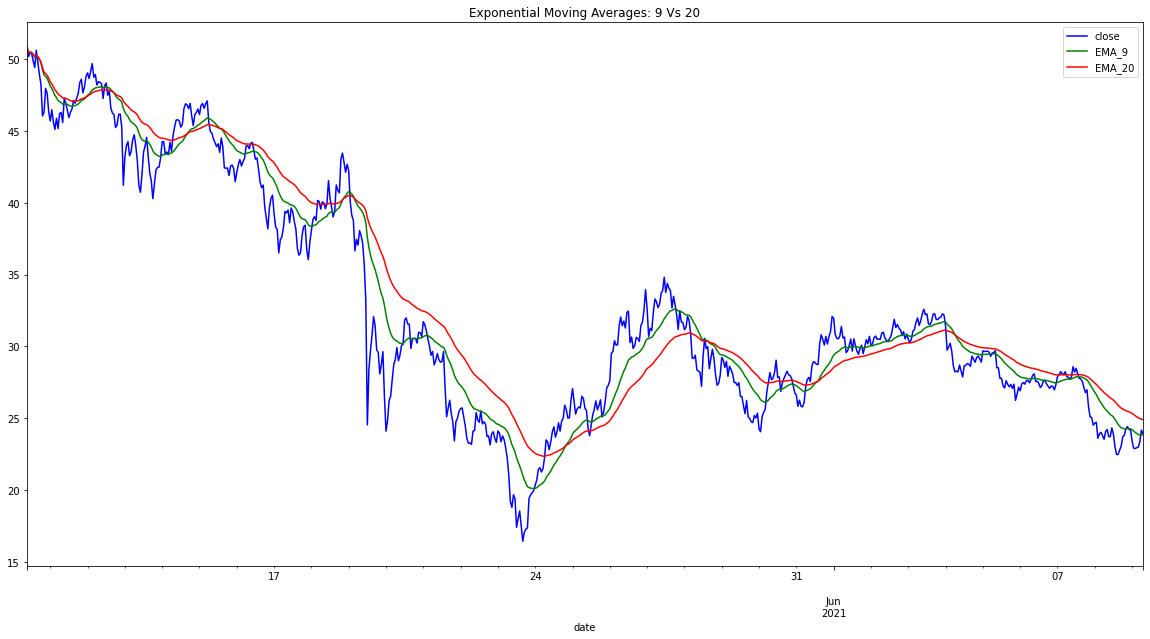

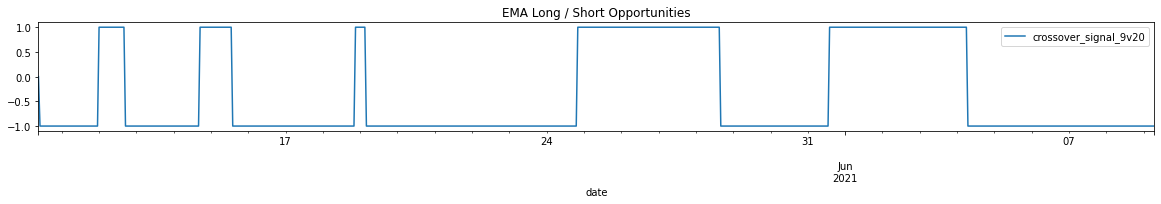

In [12]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
plt.title('Exponential Moving Averages: 9 Vs 20');
historical_prices_df[['crossover_signal_9v20']].plot(figsize=(20,2))
plt.title('EMA Long / Short Opportunities');

In [13]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

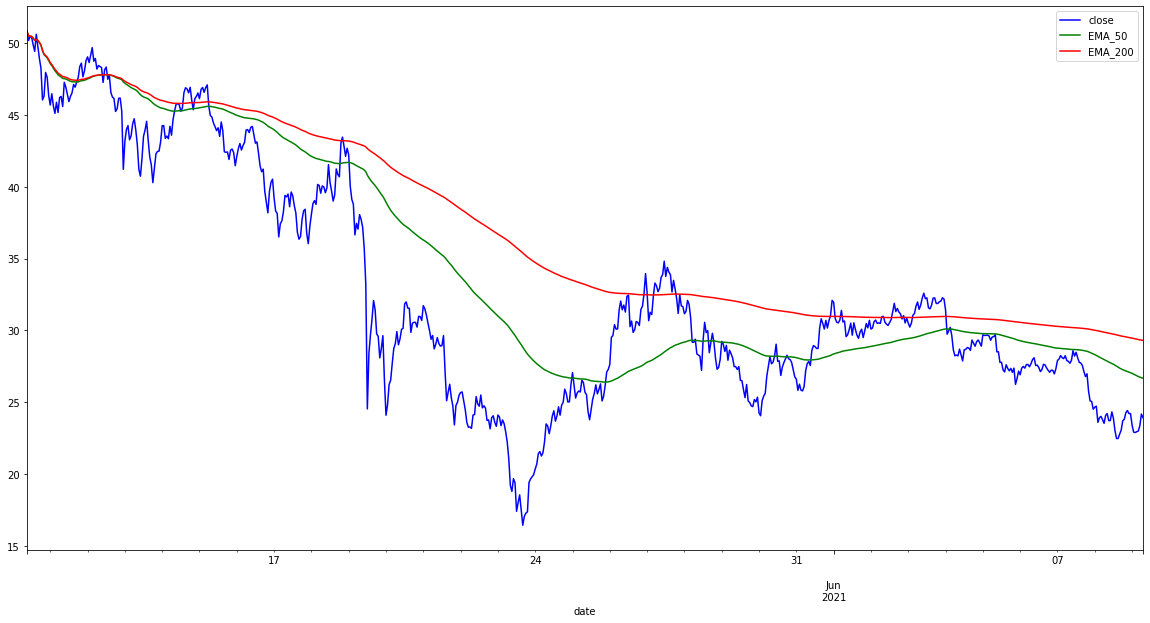

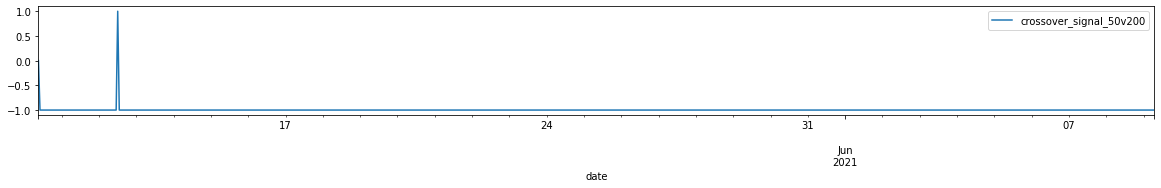

In [14]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'm'])
historical_prices_df[['crossover_signal_50v200']].plot(figsize=(20,2))

<AxesSubplot:xlabel='date'>

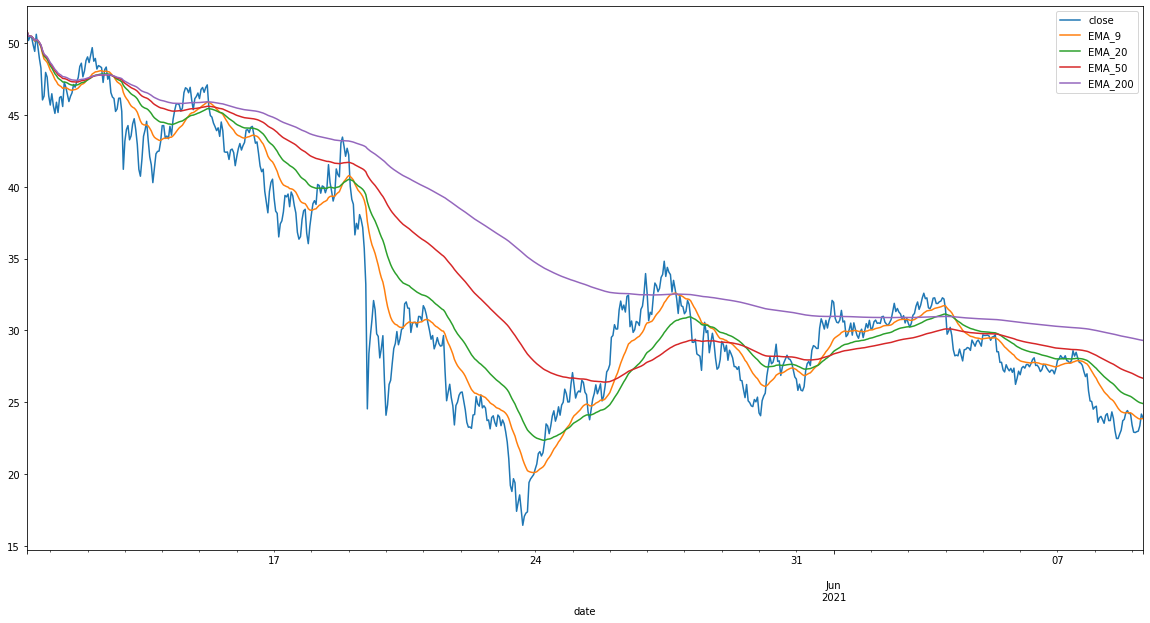

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [16]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

timestamp      open      high       low     close  \
date                                                                         
2021-05-12 11:00:00  1620817200000  47.40030  48.17051  47.40030  48.17051   
2021-05-12 12:00:00  1620820800000  47.90449  48.35014  47.78866  48.35014   
2021-05-12 13:00:00  1620824400000  47.91910  47.91910  47.44414  47.50000   
2021-05-12 14:00:00  1620828000000  47.84916  48.64140  47.44609  47.78614   
2021-05-12 15:00:00  1620831600000  47.84338  47.84338  46.45254  46.57310   
2021-05-12 16:00:00  1620835200000  46.46107  46.82640  45.45320  46.26211   
2021-05-12 17:00:00  1620838800000  46.29455  46.61474  45.93843  46.15639   
2021-05-12 18:00:00  1620842400000  46.05115  46.07427  44.23902  45.25612   
2021-05-12 19:00:00  1620846000000  44.87882  45.61741  44.19955  45.43140   
2021-05-12 20:00:00  1620849600000  45.68945  46.17338  45.50000  46.17338   

                          volume                date  daily_return      EMA_9  \
date                                                                            
2021-05-12 11:00:00   224.869279 2021-05-12 11:00:00      0.018911  48.048775   
2021-05-12 12:00:00   669.290706 2021-05-12 12:00:00      0.003729  48.071529   
2021-05-12 13:00:00   781.906287 2021-05-12 13:00:00     -0.017583  48.028437   
2021-05-12 14:00:00   499.313043 2021-05-12 14:00:00      0.006024  48.010191   
2021-05-12 15:00:00  2452.606492 2021-05-12 15:00:00     -0.025385  47.902103   
2021-05-12 16:00:00  2183.217793 2021-05-12 16:00:00     -0.006677  47.778887   
2021-05-12 17:00:00   187.495390 2021-05-12 17:00:00     -0.002285  47.657109   
2021-05-12 18:00:00  3719.158319 2021-05-12 18:00:00     -0.019505  47.477068   
2021-05-12 19:00:00   923.402707 2021-05-12 19:00:00      0.003873  47.323803   
2021-05-12 20:00:00  1130.858627 2021-05-12 20:00:00      0.016332  47.237680   

                        EMA_20  ...  crossover_long_50v200  \
date                            ...                          
2021-05-12 11:00:00  47.855608  ...                    0.0   
2021-05-12 12:00:00  47.875781  ...                    1.0   
2021-05-12 13:00:00  47.860554  ...                    0.0   
2021-05-12 14:00:00  47.857558  ...                    0.0   
2021-05-12 15:00:00  47.806165  ...                    0.0   
2021-05-12 16:00:00  47.744751  ...                    0.0   
2021-05-12 17:00:00  47.681933  ...                    0.0   
2021-05-12 18:00:00  47.586518  ...                    0.0   
2021-05-12 19:00:00  47.502194  ...                    0.0   
2021-05-12 20:00:00  47.450464  ...                    0.0   

                     crossover_short_50v200  crossover_signal_50v200  \
date                                                                   
2021-05-12 11:00:00                    -1.0                     -1.0   
2021-05-12 12:00:00                     0.0                      1.0   
2021-05-12 13:00:00                    -1.0                     -1.0   
2021-05-12 14:00:00                    -1.0                     -1.0   
2021-05-12 15:00:00                    -1.0                     -1.0   
2021-05-12 16:00:00                    -1.0                     -1.0   
2021-05-12 17:00:00                    -1.0                     -1.0   
2021-05-12 18:00:00                    -1.0                     -1.0   
2021-05-12 19:00:00                    -1.0                     -1.0   
2021-05-12 20:00:00                    -1.0                     -1.0   

                     bollinger_mid_band  bollinger_std  bollinger_upper_band  \
date                                                                           
2021-05-12 11:00:00           48.327308       0.698540             49.025848   
2021-05-12 12:00:00           48.397472       0.618473             49.015944   
2021-05-12 13:00:00           48.407353       0.601398             49.008751   
2021-05-12 14:00:00           48.415558       0.591153             49.006710   
2021-05-12 15:00:00      

### Plot Bollinger Bands

Text(0.5, 1.0, 'Bollinger Band Trading Signals')

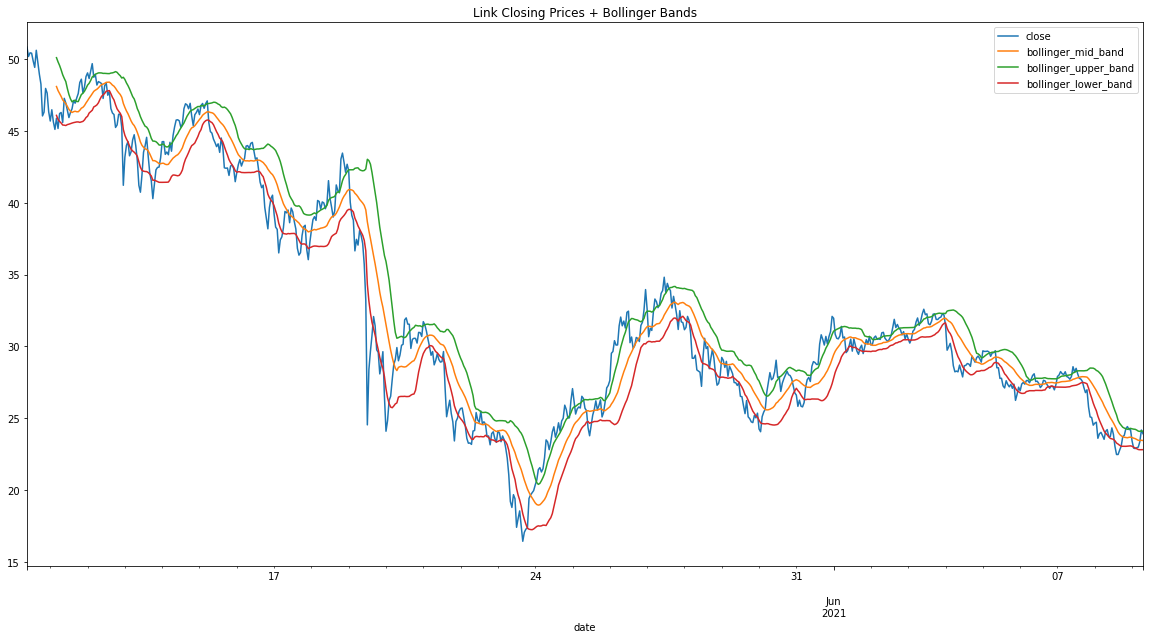

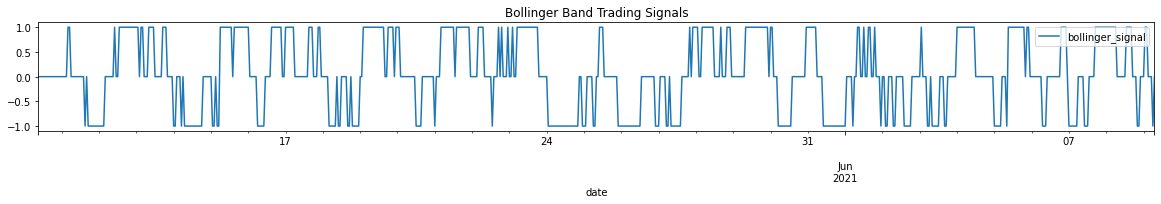

In [17]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
plt.title('Link Closing Prices + Bollinger Bands')
historical_prices_df[['bollinger_signal']].plot(figsize=(20,2))
plt.title('Bollinger Band Trading Signals')

### Build MACD Signals

In [18]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd

historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative SELL signals
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

close  mac_fast_12  mac_slow_26      macd  \
date                                                                
2021-05-12 11:00:00  48.17051    48.254571    48.103906  0.150664   
2021-05-12 12:00:00  48.35014    48.269274    48.122146  0.147128   
2021-05-12 13:00:00  47.50000    48.150924    48.076061  0.074863   
2021-05-12 14:00:00  47.78614    48.094803    48.054585  0.040218   
2021-05-12 15:00:00  46.57310    47.860695    47.944846 -0.084151   
2021-05-12 16:00:00  46.26211    47.614759    47.820199 -0.205440   
2021-05-12 17:00:00  46.15639    47.390394    47.696954 -0.306559   
2021-05-12 18:00:00  45.25612    47.062045    47.516151 -0.454107   
2021-05-12 19:00:00  45.43140    46.811176    47.361725 -0.550549   
2021-05-12 20:00:00  46.17338    46.713054    47.273700 -0.560646   
2021-05-12 21:00:00  46.18717    46.632148    47.193216 -0.561067   
2021-05-12 22:00:00  45.26291    46.421496    47.050230 -0.628734   
2021-05-12 23:00:00  41.22566    45.622137    46.618781 -0.996644   
2021-05-13 00:00:00  43.18796    45.247648    46.364646 -1.116998   
2021-05-13 01:00:00  43.99578    45.055053    46.189174 -1.134121   
2021-05-13 02:00:00  44.27236    44.934639    46.047188 -1.112549   
2021-05-13 03:00:00  43.28022    44.680113    45.842227 -1.162115   
2021-05-13 04:00:00  43.55515    44.507042    45.672814 -1.165773   
2021-05-13 05:00:00  44.38671    44.488529    45.577547 -1.089018   
2021-05-13 06:00:00  44.74971    44.528711    45.516226 -0.987515   
2021-05-13 07:00:00  43.99000    44.445832    45.403172 -0.957340   
2021-05-13 08:00:00  42.95477    44.216438    45.221809 -1.005371   
2021-05-13 09:00:00  41.22402    43.756066    44.925677 -1.169611   
2021-05-13 10:00:00  40.74371    43.292627    44.615901 -1.323275   
2021-05-13 11:00:00  41.95278    43.086496    44.418633 -1.332137   
2021-05-13 12:00:00  43.52829    43.154465    44.352682 -1.198217   
2021-05-13 13:00:00  43.96705    43.279478    44.324116 -1.044639   
2021-05-13 14:00:00  44.56894    43.477857    44.342251 -0.864395   
2021-05-13 15:00:00  43.25543    43.443637    44.261746 -0.818109   
2021-05-13 16:00:00  42.10000    43.236924    44.101617 -0.864693   
2021-05-13 17:00:00  41.53864    42.975649    43.911767 -0.936117   
2021-05-13 18:00:00  40.29654    42.563479    43.643972 -1.080494   
2021-05-13 19:00:00  41.32421    42.372822    43.472138 -1.099316   
2021-05-13 20:00:00  42.30095    42.361765    43.385383 -1.023619   
2021-05-13 21:00:00  42.47000    42.378416    43.317577 -0.939161   
2021-05-13 22:00:00  42.49652    42.396586    43.256758 -0.860172   
2021-05-13 23:00:00  43.14226    42.511305    43.248277 -0.736972   
2021-05-14 00:00:00  44.26324    42.780834    43.323459 -0.542626   
2021-05-14 01:00:00  44.27103    43.010095    43.393650 -0.383555   
2021-05-14 02:00:00  43.38080    43.067126    43.392698 -0.325572   
2021-05-14 03:00:00  43.54596    43.140793    43.404051 -0.263258   
2021-05-14 04:00:00  43.35558    43.173837    43.400460 -0.226623   
2021-05-14 05:00:00  44.22125    43.334978    43.461259 -0.126282   
2021-05-14 06:00:00  43.60051    43.375829    43.471574 -0.095746   
2021-05-14 07:00:00  44.69707    43.579097    43.562352  0.016745   
2021-05-14 08:00:00  45.30000    43.843851    43.691066  0.152785   
2021-05-14 09:00:00  45.77142    44.140400    43.845167  0.295233   
2021-05-14 10:00:00  45.79216    44.394517    43.989388  0.405129   
2021-05-14 11:00:00  45.71715    44.597999    44.117371  0.480628   
2021-05-14 12:00:00  45.27235    44.701745    44.202925  0.498821   

                     mac_signal_line_9ema  macd_diff  macd_long  macd_short  \
date                                                                          
2021-05-12 11:00:00              0.247146  -0.096481        0.0        -1.0   
2021-05-12 12:00:00              0.227142  -0.080014        0.0        -1.0   
2021-05-12 13:00:00              0.196686  -0.121823        0.0        -1.0   
2021-05-12 14:00:00              0.16539

In [1]:
historical_prices_df[['close']].plot(figsize=(20,4))
plt.title('LINK Closing Prices');
historical_prices_df[['macd','mac_signal_line_9ema']].plot(figsize=(20,4), color=['g', 'r'])
plt.title('MACD vs Signal');
historical_prices_df[['macd_signal']].plot(figsize=(20,2))
plt.title('MACD signals');

NameError: name 'historical_prices_df' is not defined

<AxesSubplot:xlabel='date'>

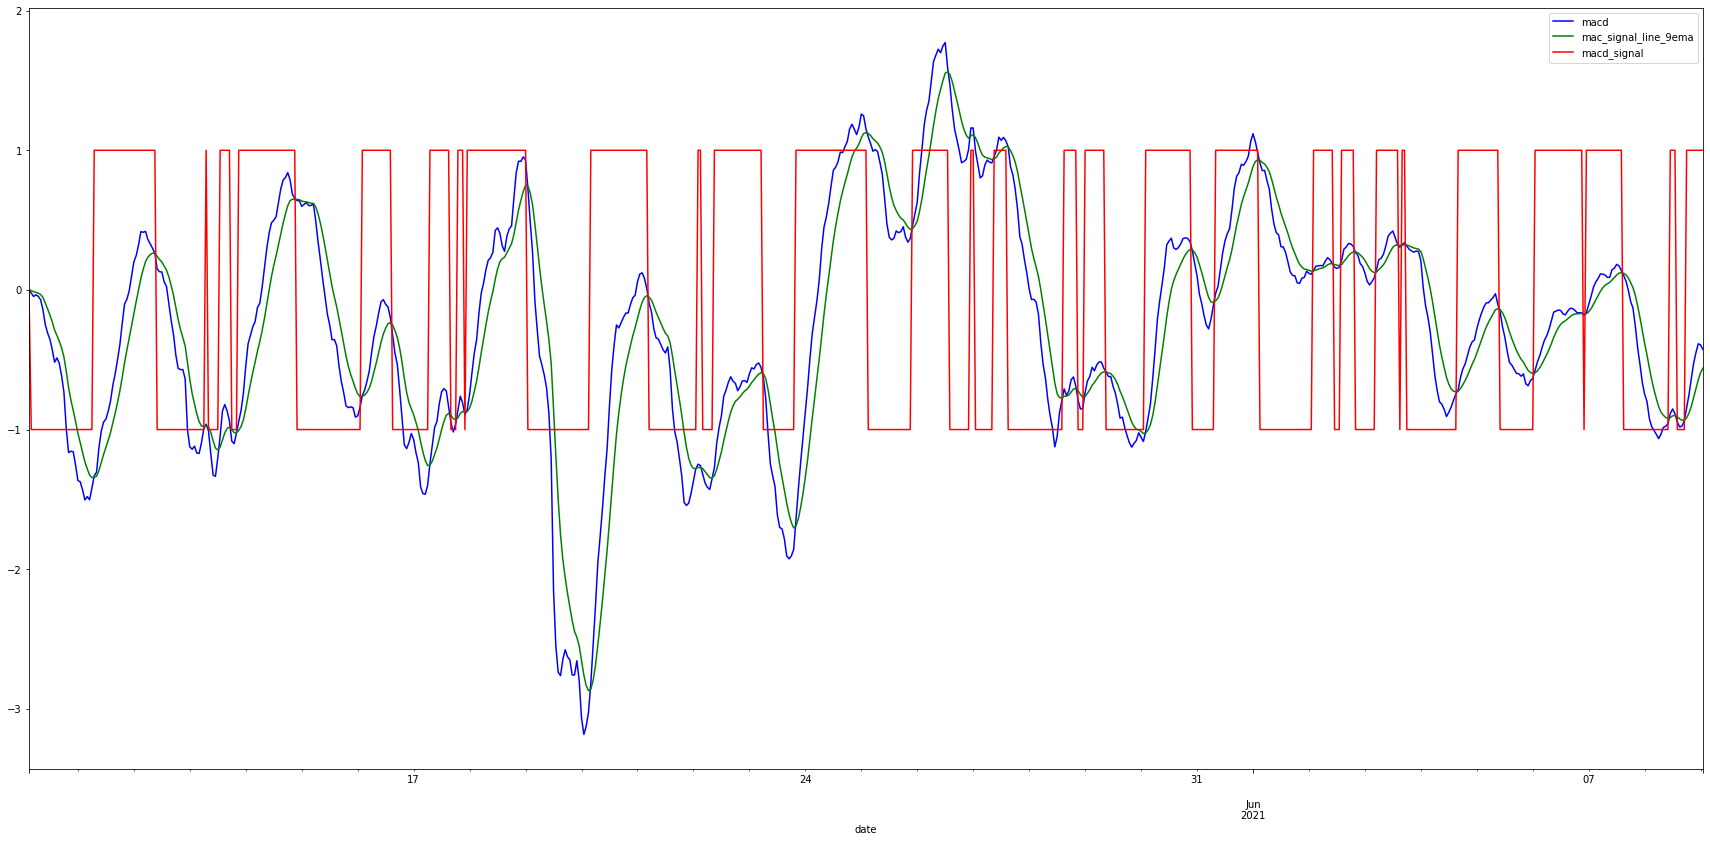

In [20]:
historical_prices_df[['macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(30,14), color=['b', 'g', 'r'])

### Build RSI Signals

In [21]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-10 03:00:00  1620615600000  51.52637  52.13023  51.46257  51.96999   
2021-05-10 04:00:00  1620619200000  51.86840  51.86840  51.34493  51.68809   
2021-05-10 05:00:00  1620622800000  52.17464  52.25859  51.49503  51.60000   
2021-05-10 06:00:00  1620626400000  51.70966  52.41087  51.70966  51.98208   
2021-05-10 07:00:00  1620630000000  52.09619  52.42767  51.72000  51.72000   

                         volume                date  daily_return      EMA_9  \
date                                                                           
2021-05-10 03:00:00  388.921150 2021-05-10 03:00:00      0.008524  51.969990   
2021-05-10 04:00:00  175.795043 2021-05-10 04:00:00     -0.005424  51.823615   
2021-05-10 05:00:00  396.570778 2021-05-10 05:00:00     -0.001704  51.743268   
2021-05-10 06:00:00  741.915661 2021-05-10 06:00:00      0.007405  51.810035   
2021-05-10 07:00:00  709.976707 2021-05-10 07:00:00     -0.005042  51.789153   

                        EMA_20  ...  macd_diff_gradient  \
date                            ...                       
2021-05-10 03:00:00  51.969990  ...                 NaN   
2021-05-10 04:00:00  51.826598  ...                -inf   
2021-05-10 05:00:00  51.748433  ...            0.884566   
2021-05-10 06:00:00  51.809915  ...           -0.480913   
2021-05-10 07:00:00  51.790665  ...            0.308250   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit   change     gain     loss  \
date                                                                           
2021-05-10 03:00:00                           0.0      NaN      NaN      NaN   
2021-05-10 04:00:00                           0.0 -0.28190  0.00000  0.28190   
2021-05-10 05:00:00                           1.0 -0.08809  0.00000  0.08809   
2021-05-10 06:00:00                           0.0  0.38208  0.38208  0.00000   
2021-05-10 07:00:00                           1.0 -0.26208  0.00000  0.26208   

                     avg_gain  avg_loss  rs  rsi_14  
date                                                 
2021-05-10 03:00:00       NaN       NaN NaN     NaN  
2021-05-10 04:00:00       NaN       NaN NaN     NaN  
2021-05-10 05:00:00       NaN       NaN NaN     NaN  
2021-05-10 06:00:00       NaN       NaN NaN     NaN  
2021-05-10 07:00:00       NaN       NaN NaN     NaN  

[5 rows x 44 columns]

In [22]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[50:100]
# historical_prices_df.head()

close  daily_return        rs     rsi_14  \
date                                                               
2021-05-12 05:00:00  48.94800      0.003955  1.241840  55.393791   
2021-05-12 06:00:00  48.21088     -0.015059  1.006641  50.165472   
2021-05-12 07:00:00  48.45093      0.004979  1.073064  51.762220   
2021-05-12 08:00:00  48.39182     -0.001220  1.054490  51.326118   
2021-05-12 09:00:00  48.30960     -0.001699  1.027839  50.686429   
2021-05-12 10:00:00  47.27648     -0.021385  0.765903  43.371753   
2021-05-12 11:00:00  48.17051      0.018911  1.003399  50.084835   
2021-05-12 12:00:00  48.35014      0.003729  1.054788  51.333176   
2021-05-12 13:00:00  47.50000     -0.017583  0.835861  45.529657   
2021-05-12 14:00:00  47.78614      0.006024  0.911094  47.673950   
2021-05-12 15:00:00  46.57310     -0.025385  0.678165  40.411117   
2021-05-12 16:00:00  46.26211     -0.006677  0.633453  38.779988   
2021-05-12 17:00:00  46.15639     -0.002285  0.618523  38.215285   
2021-05-12 18:00:00  45.25612     -0.019505  0.508596  33.713208   
2021-05-12 19:00:00  45.43140      0.003873  0.545860  35.311108   
2021-05-12 20:00:00  46.17338      0.016332  0.715739  41.716065   
2021-05-12 21:00:00  46.18717      0.000299  0.719139  41.831339   
2021-05-12 22:00:00  45.26291     -0.020011  0.577427  36.605623   
2021-05-12 23:00:00  41.22566     -0.089196  0.299654  23.056453   
2021-05-13 00:00:00  43.18796      0.047599  0.551455  35.544375   
2021-05-13 01:00:00  43.99578      0.018705  0.663088  39.870875   
2021-05-13 02:00:00  44.27236      0.006287  0.704248  41.323100   
2021-05-13 03:00:00  43.28022     -0.022410  0.607630  37.796639   
2021-05-13 04:00:00  43.55515      0.006352  0.648572  39.341438   
2021-05-13 05:00:00  44.38671      0.019092  0.781931  43.881101   
2021-05-13 06:00:00  44.74971      0.008178  0.844624  45.788411   
2021-05-13 07:00:00  43.99000     -0.016977  0.740054  42.530505   
2021-05-13 08:00:00  42.95477     -0.023533  0.626270  38.509584   
2021-05-13 09:00:00  41.22402     -0.040292  0.490491  32.908024   
2021-05-13 10:00:00  40.74371     -0.011651  0.460644  31.537037   
2021-05-13 11:00:00  41.95278      0.029675  0.625608  38.484559   
2021-05-13 12:00:00  43.52829      0.037554  0.857105  46.152737   
2021-05-13 13:00:00  43.96705      0.010080  0.926533  48.093276   
2021-05-13 14:00:00  44.56894      0.013690  1.029100  50.717071   
2021-05-13 15:00:00  43.25543     -0.029471  0.829216  45.331771   
2021-05-13 16:00:00  42.10000     -0.026712  0.700352  41.188644   
2021-05-13 17:00:00  41.53864     -0.013334  0.647688  39.308899   
2021-05-13 18:00:00  40.29654     -0.029902  0.549269  35.453413   
2021-05-13 19:00:00  41.32421      0.025503  0.684662  40.640904   
2021-05-13 20:00:00  42.30095      0.023636  0.823244  45.152699   
2021-05-13 21:00:00  42.47000      0.003996  0.849074  45.918876   
2021-05-13 22:00:00  42.49652      0.000624  0.853438  46.046208   
2021-05-13 23:00:00  43.14226      0.015195  0.967868  49.183577   
2021-05-14 00:00:00  44.26324      0.025983  1.181794  54.166163   
2021-05-14 01:00:00  44.27103      0.000176  1.183395  54.199771   
2021-05-14 02:00:00  43.38080     -0.020109  0.988607  49.713550   
2021-05-14 03:00:00  43.54596      0.003807  1.021494  50.531635   
2021-05-14 04:00:00  43.35558     -0.004372  0.981428  49.531339   
2021-05-14 05:00:00  44.22125      0.019967  1.173497  53.991203   
2021-05-14 06:00:00  43.60051     -0.014037  1.021925  50.542182   

                     rsi_overbought  rsi_oversold  
date                                               
2021-05-12 05:00:00             0.0           0.0  
2021-05-12 06:00:00             0.0           0.0  
2021-05-12 07:00:00             0.0           0.0  
2021-05-12 08:00:00             0.0           0.0  
2021-05-12 09:00:00             0.0           0.0  
2021-05-12 10:00:00             0.0           0.0  
2021-05-12 11:00:00             0.0           0.0  
2021-05-12 12:00:00

In [23]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_periods', 'rsi_oversold_preceeding_periods'] # NEED TO ADD 'rsi_signal',


historical_prices_df['rsi_oversold_preceeding_periods'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_periods'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_periods'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_periods'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_periods',	'rsi_oversold_preceeding_periods',	'rsi_long',	'rsi_short',	'rsi_signal']
# display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[195:230])

rs     rsi_14  rsi_overbought  rsi_oversold  \
date                                                                     
2021-05-18 06:00:00  1.191186  54.362611             0.0           0.0   
2021-05-18 07:00:00  1.317927  56.857999             0.0           0.0   
2021-05-18 08:00:00  1.294138  56.410635             0.0           0.0   
2021-05-18 09:00:00  1.159518  53.693360             0.0           0.0   
2021-05-18 10:00:00  1.254585  55.645933             0.0           0.0   
2021-05-18 11:00:00  1.732530  63.403882             0.0           0.0   
2021-05-18 12:00:00  1.240380  55.364714             0.0           0.0   
2021-05-18 13:00:00  1.079034  51.900731             0.0           0.0   
2021-05-18 14:00:00  0.931442  48.225201             0.0           0.0   
2021-05-18 15:00:00  1.023950  50.591673             0.0           0.0   
2021-05-18 16:00:00  1.441163  59.035915             0.0           0.0   
2021-05-18 17:00:00  1.316123  56.824405             0.0           0.0   
2021-05-18 18:00:00  1.264248  55.835228             0.0           0.0   
2021-05-18 19:00:00  1.860173  65.037075             0.0           0.0   
2021-05-18 20:00:00  1.973307  66.367412             0.0           0.0   
2021-05-18 21:00:00  1.661874  62.432483             0.0           0.0   
2021-05-18 22:00:00  1.400952  58.349853             0.0           0.0   
2021-05-18 23:00:00  1.536252  60.571747             0.0           0.0   
2021-05-19 00:00:00  1.373727  57.872156             0.0           0.0   
2021-05-19 01:00:00  0.886196  46.983235             0.0           0.0   
2021-05-19 02:00:00  0.764974  43.341926             0.0           0.0   
2021-05-19 03:00:00  0.724801  42.022284             0.0           0.0   
2021-05-19 04:00:00  0.535839  34.889010             0.0           0.0   
2021-05-19 05:00:00  0.641534  39.081354             0.0           0.0   
2021-05-19 06:00:00  0.607165  37.778648             0.0           0.0   
2021-05-19 07:00:00  0.753022  42.955639             0.0           0.0   
2021-05-19 08:00:00  0.715398  41.704475             0.0           0.0   
2021-05-19 09:00:00  0.656952  39.648214             0.0           0.0   
2021-05-19 10:00:00  0.534525  34.833258             0.0           0.0   
2021-05-19 11:00:00  0.397473  28.442277             0.0           1.0   
2021-05-19 12:00:00  0.202964  16.871964             0.0           1.0   
2021-05-19 13:00:00  0.437065  30.413723             0.0           0.0   
2021-05-19 14:00:00  0.521288  34.266222             0.0           0.0   
2021-05-19 15:00:00  0.598509  37.441701             0.0           0.0   
2021-05-19 16:00:00  0.697524  41.090654             0.0           0.0   

                     rsi_overbought_preceeding_periods  \
date                                                     
2021-05-18 06:00:00                                0.0   
2021-05-18 07:00:00                                0.0   
2021-05-18 08:00:00                                0.0   
2021-05-18 09:00:00                                0.0   
2021-05-18 10:00:00                                0.0   
2021-05-18 11:00:00                                0.0   
2021-05-18 12:00:00                                0.0   
2021-05-18 13:00:00                                0.0   
2021-05-18 14:00:00                                0.0   
2021-05-18 15:00:00                                0.0   
2021-05-18 16:00:00                                0.0   
2021-05-18 17:00:00                                0.0   
2021-05-18 18:00:00                                0.0   
2021-05-18 19:00:00                                0.0   
2021-05-18 20:00:00                                0.0   
2021-05-18 21:00:00                                0.0   
2021-05-18 22:00:00                                0.0   
2021-05-18 23:00:00                                0.0   
2021-05-19 00:00:00                                0.0   
2021-05-19 01:00:00                                0.0   
2021-05-19 0

<AxesSubplot:xlabel='date'>

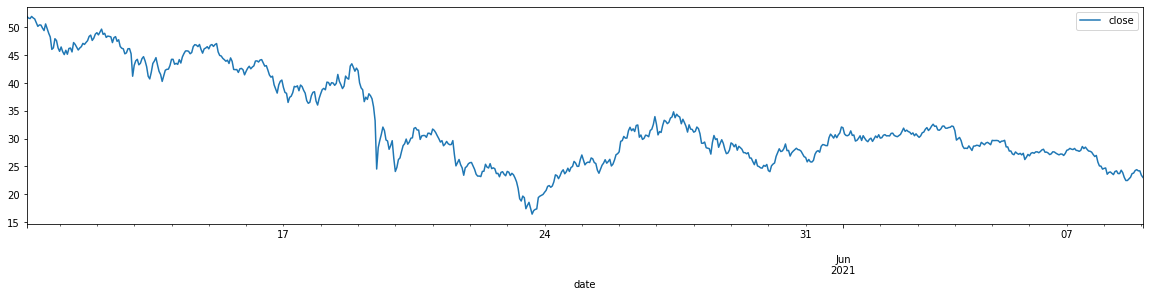

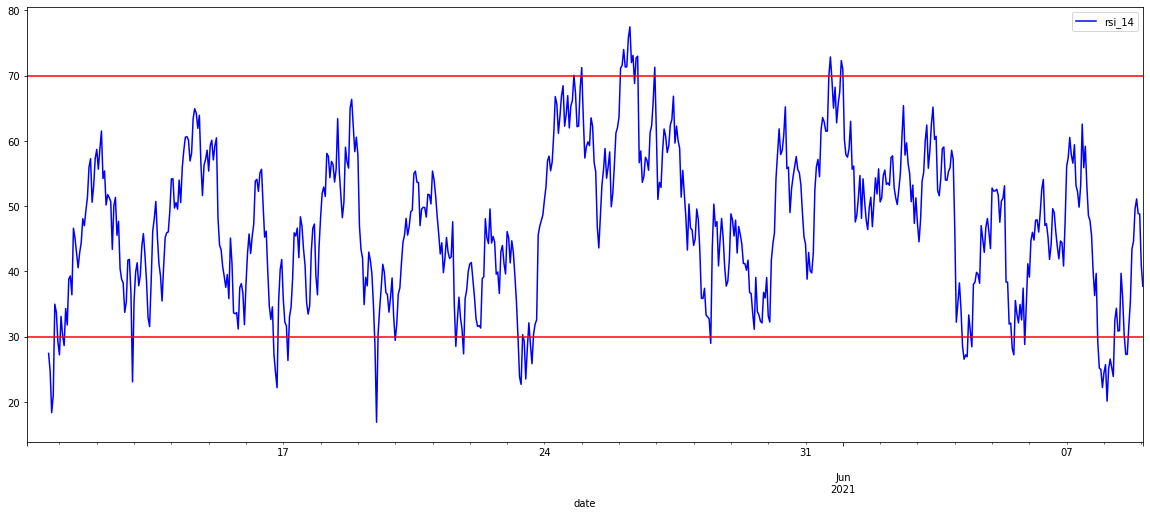

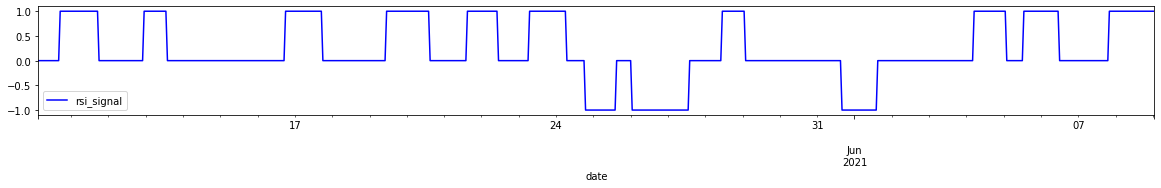

In [24]:
historical_prices_df[['close']].plot(figsize=(20,4))
historical_prices_df[['rsi_14']].plot(figsize=(20,8), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')
historical_prices_df[['rsi_signal']].plot(figsize=(20,2), color=['b'])

In [25]:
historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                         
2021-05-10 03:00:00  1620615600000  51.52637  52.13023  51.46257  51.96999   
2021-05-10 04:00:00  1620619200000  51.86840  51.86840  51.34493  51.68809   
2021-05-10 05:00:00  1620622800000  52.17464  52.25859  51.49503  51.60000   
2021-05-10 06:00:00  1620626400000  51.70966  52.41087  51.70966  51.98208   
2021-05-10 07:00:00  1620630000000  52.09619  52.42767  51.72000  51.72000   

                         volume                date  daily_return      EMA_9  \
date                                                                           
2021-05-10 03:00:00  388.921150 2021-05-10 03:00:00      0.008524  51.969990   
2021-05-10 04:00:00  175.795043 2021-05-10 04:00:00     -0.005424  51.823615   
2021-05-10 05:00:00  396.570778 2021-05-10 05:00:00     -0.001704  51.743268   
2021-05-10 06:00:00  741.915661 2021-05-10 06:00:00      0.007405  51.810035   
2021-05-10 07:00:00  709.976707 2021-05-10 07:00:00     -0.005042  51.789153   

                        EMA_20  ...  avg_loss  rs  rsi_14  rsi_oversold  \
date                            ...                                       
2021-05-10 03:00:00  51.969990  ...       NaN NaN     NaN           0.0   
2021-05-10 04:00:00  51.826598  ...       NaN NaN     NaN           0.0   
2021-05-10 05:00:00  51.748433  ...       NaN NaN     NaN           0.0   
2021-05-10 06:00:00  51.809915  ...       NaN NaN     NaN           0.0   
2021-05-10 07:00:00  51.790665  ...       NaN NaN     NaN           0.0   

                     rsi_overbought  rsi_oversold_preceeding_periods  \
date                                                                   
2021-05-10 03:00:00             0.0                              0.0   
2021-05-10 04:00:00             0.0                              0.0   
2021-05-10 05:00:00             0.0                              0.0   
2021-05-10 06:00:00             0.0                              0.0   
2021-05-10 07:00:00             0.0                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-10 03:00:00                                0.0        0.0       0.0   
2021-05-10 04:00:00                                0.0        0.0       0.0   
2021-05-10 05:00:00                                0.0        0.0       0.0   
2021-05-10 06:00:00                                0.0        0.0       0.0   
2021-05-10 07:00:00                                0.0        0.0       0.0   

                     rsi_signal  
date                             
2021-05-10 03:00:00         0.0  
2021-05-10 04:00:00         0.0  
2021-05-10 05:00:00         0.0  
2021-05-10 06:00:00         0.0  
2021-05-10 07:00:00         0.0  

[5 rows x 51 columns]

# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [26]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [27]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal', 'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal']
st3_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal']
st4_x_var_list = ['close', 'crossover_signal_50v200', 'crossover_signal_9v20']

## Strategy 1 - EMA50V200 + Bollinger

In [28]:
historical_prices_df[st1_x_var_list]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-10 03:00:00  51.96999                      0.0               0.0   
2021-05-10 04:00:00  51.68809                     -1.0               0.0   
2021-05-10 05:00:00  51.60000                     -1.0               0.0   
2021-05-10 06:00:00  51.98208                     -1.0               0.0   
2021-05-10 07:00:00  51.72000                     -1.0               0.0   
...                       ...                      ...               ...   
2021-06-08 21:00:00  24.41741                     -1.0              -1.0   
2021-06-08 22:00:00  24.20817                     -1.0               0.0   
2021-06-08 23:00:00  24.20062                     -1.0               0.0   
2021-06-09 00:00:00  23.41281                     -1.0               0.0   
2021-06-09 01:00:00  23.02404                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-05-10 03:00:00                 NaN                   NaN   
2021-05-10 04:00:00                 NaN                   NaN   
2021-05-10 05:00:00                 NaN                   NaN   
2021-05-10 06:00:00                 NaN                   NaN   
2021-05-10 07:00:00                 NaN                   NaN   
...                                 ...                   ...   
2021-06-08 21:00:00           23.636373             24.223355   
2021-06-08 22:00:00           23.666872             24.267455   
2021-06-08 23:00:00           23.681192             24.291322   
2021-06-09 00:00:00           23.651232             24.258969   
2021-06-09 01:00:00           23.613491             24.236139   

                     bollinger_lower_band  
date                                       
2021-05-10 03:00:00                   NaN  
2021-05-10 04:00:00                   NaN  
2021-05-10 05:00:00                   NaN  
2021-05-10 06:00:00                   NaN  
2021-05-10 07:00:00                   NaN  
...                                   ...  
2021-06-08 21:00:00             23.049391  
2021-06-08 22:00:00             23.066289  
2021-06-08 23:00:00             23.071062  
2021-06-09 00:00:00             23.043494  
2021-06-09 01:00:00             22.990842  

[719 rows x 6 columns]

In [29]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]


# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-08 06:00:00  23.52668                     -1.0               1.0   
2021-06-08 07:00:00  24.08114                     -1.0               0.0   
2021-06-08 08:00:00  24.20431                     -1.0               0.0   
2021-06-08 09:00:00  23.71481                     -1.0               0.0   
2021-06-08 10:00:00  23.71981                     -1.0               0.0   
2021-06-08 11:00:00  24.32365                     -1.0               0.0   
2021-06-08 12:00:00  23.87108                     -1.0               0.0   
2021-06-08 13:00:00  23.02143                     -1.0               1.0   
2021-06-08 14:00:00  22.46968                     -1.0               1.0   
2021-06-08 15:00:00  22.46928                     -1.0               1.0   
2021-06-08 16:00:00  22.77237                     -1.0               1.0   
2021-06-08 17:00:00  23.05031                     -1.0               0.0   
2021-06-08 18:00:00  23.70662                     -1.0               0.0   
2021-06-08 19:00:00  23.80893                     -1.0               0.0   
2021-06-08 20:00:00  24.26666                     -1.0              -1.0   
2021-06-08 21:00:00  24.41741                     -1.0              -1.0   
2021-06-08 22:00:00  24.20817                     -1.0               0.0   
2021-06-08 23:00:00  24.20062                     -1.0               0.0   
2021-06-09 00:00:00  23.41281                     -1.0               0.0   
2021-06-09 01:00:00  23.02404                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-06-08 06:00:00           25.869351             27.632881   
2021-06-08 07:00:00           25.662848             27.378891   
2021-06-08 08:00:00           25.449334             27.059516   
2021-06-08 09:00:00           25.230289             26.757354   
2021-06-08 10:00:00           25.027314             26.464906   
2021-06-08 11:00:00           24.857235             26.153067   
2021-06-08 12:00:00           24.672515             25.816377   
2021-06-08 13:00:00           24.466622             25.509223   
2021-06-08 14:00:00           24.250912             25.233408   
2021-06-08 15:00:00           24.025497             24.854701   
2021-06-08 16:00:00           23.875158             24.639736   
2021-06-08 17:00:00           23.773267             24.502666   
2021-06-08 18:00:00           23.706003             24.370416   
2021-06-08 19:00:00           23.670724             24.308133   
2021-06-08 20:00:00           23.651523             24.263119   
2021-06-08 21:00:00           23.636373             24.223355   
2021-06-08 22:00:00           23.666872             24.267455   
2021-06-08 23:00:00           23.681192             24.291322   
2021-06-09 00:00:00           23.651232             24.258969   
2021-06-09 01:00:00           23.613491             24.236139   

                     bollinger_lower_band  bollinger_shift bull_or_bear  
date                                                                     
2021-06-08 06:00:00             24.105821              1.0         Bear  
2021-06-08 07:00:00             23.946805              1.0         Bear  
2021-06-08 08:00:00             23.839153              0.0         Bear  
2021-06-08 09:00:00             23.703224              0.0         Bear  
2021-06-08 10:00:00             23.589723              0.0         Bear  
2021-06-08 11:00:00             23.561402              0.0         Bear  
2021-06-08 12:00:00             23.528653              0.0         Bear  
2021-06-08 13:00:00             23.424022              0.0         Bear  
2021-06-08 14:00:00             23.268415              1.0         Bear  
2021-06-08 15:00:00             23.196293              1.0         Bear  
2021-06-08 16:00:00             

In [30]:
# IF BULL, BOLLINGER == 0, BOLLINGER_SHIFT == 1,

## Program the Conditional Logic for the Trading Strategy

In [31]:
# IF BEAR + BOLLINGER BUY (1), Position = 0
# IF BEAR + BOLLINGER SELL (-1), Position = -1
# IF BULL + BOLLINGER BUY (1), Position = 1
# IF BULL + BOLLINGER SELL (-1), Position = 0

In [32]:
st1_position_code = 0
st1_positions = []

for index, row in strategy_1.iterrows():


    # BUY SIGNALS, ONLY ENTERING TRADE WHEN PRICE REENTERS FAIR TRADING ZONE
    
    # IF BEAR + BOLL (WAS JUST) == -1, EXIT SHORT (BUY OUT)
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        st1_position_code = -1
        st1_positions.append(st1_position_code)
    
    
    # ELIF BULL + BOLL == 1 BUY
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        st1_position_code = 1
        st1_positions.append(st1_position_code)  


    # EXIT SIGNALS. LESS CONDITIONS. SELL THE SECOND TRADING CONDITIONS AREN'T FAVOURABLE


    # ELIF BEAR + BOLL == 1, EXIT SHORT / NO POSITION
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1) & (row['bollinger_shift'] != 1):
        st1_position_code = 0
        st1_positions.append(st1_position_code)
    
    
    
    # ELIF BULL + BOLL == -1, EXIT LONG / NO POSITION
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1) & (row['bollinger_shift'] == -1):
        st1_position_code = 0
        st1_positions.append(st1_position_code) 

    
    # ELSE : O / NA
    else:
        st1_position_code = st1_position_code
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")

# Double check the dataframes have the same row lengths
display(len(st1_positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 8)

(719, 51)

In [33]:
strategy_1['boll_ema50200_position'] = st1_positions
historical_prices_df['st1_boll_ema50200_position'] = st1_positions
# strategy_1[130:170]
strategy_1[695:830]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-06-08 02:00:00  23.59819                     -1.0               1.0   
2021-06-08 03:00:00  23.91422                     -1.0               1.0   
2021-06-08 04:00:00  24.01202                     -1.0               1.0   
2021-06-08 05:00:00  23.77886                     -1.0               1.0   
2021-06-08 06:00:00  23.52668                     -1.0               1.0   
2021-06-08 07:00:00  24.08114                     -1.0               0.0   
2021-06-08 08:00:00  24.20431                     -1.0               0.0   
2021-06-08 09:00:00  23.71481                     -1.0               0.0   
2021-06-08 10:00:00  23.71981                     -1.0               0.0   
2021-06-08 11:00:00  24.32365                     -1.0               0.0   
2021-06-08 12:00:00  23.87108                     -1.0               0.0   
2021-06-08 13:00:00  23.02143                     -1.0               1.0   
2021-06-08 14:00:00  22.46968                     -1.0               1.0   
2021-06-08 15:00:00  22.46928                     -1.0               1.0   
2021-06-08 16:00:00  22.77237                     -1.0               1.0   
2021-06-08 17:00:00  23.05031                     -1.0               0.0   
2021-06-08 18:00:00  23.70662                     -1.0               0.0   
2021-06-08 19:00:00  23.80893                     -1.0               0.0   
2021-06-08 20:00:00  24.26666                     -1.0              -1.0   
2021-06-08 21:00:00  24.41741                     -1.0              -1.0   
2021-06-08 22:00:00  24.20817                     -1.0               0.0   
2021-06-08 23:00:00  24.20062                     -1.0               0.0   
2021-06-09 00:00:00  23.41281                     -1.0               0.0   
2021-06-09 01:00:00  23.02404                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-06-08 02:00:00           26.710392             28.277416   
2021-06-08 03:00:00           26.513801             28.174677   
2021-06-08 04:00:00           26.328723             28.053862   
2021-06-08 05:00:00           26.122387             27.895131   
2021-06-08 06:00:00           25.869351             27.632881   
2021-06-08 07:00:00           25.662848             27.378891   
2021-06-08 08:00:00           25.449334             27.059516   
2021-06-08 09:00:00           25.230289             26.757354   
2021-06-08 10:00:00           25.027314             26.464906   
2021-06-08 11:00:00           24.857235             26.153067   
2021-06-08 12:00:00           24.672515             25.816377   
2021-06-08 13:00:00           24.466622             25.509223   
2021-06-08 14:00:00           24.250912             25.233408   
2021-06-08 15:00:00           24.025497             24.854701   
2021-06-08 16:00:00           23.875158             24.639736   
2021-06-08 17:00:00           23.773267             24.502666   
2021-06-08 18:00:00           23.706003             24.370416   
2021-06-08 19:00:00           23.670724             24.308133   
2021-06-08 20:00:00           23.651523             24.263119   
2021-06-08 21:00:00           23.636373             24.223355   
2021-06-08 22:00:00           23.666872             24.267455   
2021-06-08 23:00:00           23.681192             24.291322   
2021-06-09 00:00:00           23.651232             24.258969   
2021-06-09 01:00:00           23.613491             24.236139   

                     bollinger_lower_band  bollinger_shift bull_or_bear  \
date                                                                      
2021-06-08 02:00:00             25.143368              1.0         Bear   
2021-06-08 03:00:00             24.852925              1.0         Bear   
2021-06-08 04:00:00             24.603584              1

In [34]:
strategy_1['boll_ema50200_position_shift'] = strategy_1['boll_ema50200_position'].shift(1)
strategy_1[50:100]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-12 05:00:00  48.94800                     -1.0               0.0   
2021-05-12 06:00:00  48.21088                     -1.0               0.0   
2021-05-12 07:00:00  48.45093                     -1.0               0.0   
2021-05-12 08:00:00  48.39182                     -1.0               0.0   
2021-05-12 09:00:00  48.30960                     -1.0               0.0   
2021-05-12 10:00:00  47.27648                     -1.0               1.0   
2021-05-12 11:00:00  48.17051                     -1.0               0.0   
2021-05-12 12:00:00  48.35014                     -1.0               0.0   
2021-05-12 13:00:00  47.50000                     -1.0               1.0   
2021-05-12 14:00:00  47.78614                     -1.0               1.0   
2021-05-12 15:00:00  46.57310                     -1.0               1.0   
2021-05-12 16:00:00  46.26211                     -1.0               1.0   
2021-05-12 17:00:00  46.15639                     -1.0               1.0   
2021-05-12 18:00:00  45.25612                     -1.0               1.0   
2021-05-12 19:00:00  45.43140                     -1.0               1.0   
2021-05-12 20:00:00  46.17338                     -1.0               1.0   
2021-05-12 21:00:00  46.18717                     -1.0               1.0   
2021-05-12 22:00:00  45.26291                     -1.0               1.0   
2021-05-12 23:00:00  41.22566                     -1.0               1.0   
2021-05-13 00:00:00  43.18796                     -1.0               1.0   
2021-05-13 01:00:00  43.99578                     -1.0               1.0   
2021-05-13 02:00:00  44.27236                     -1.0               0.0   
2021-05-13 03:00:00  43.28022                     -1.0               1.0   
2021-05-13 04:00:00  43.55515                     -1.0               1.0   
2021-05-13 05:00:00  44.38671                     -1.0               0.0   
2021-05-13 06:00:00  44.74971                     -1.0               0.0   
2021-05-13 07:00:00  43.99000                     -1.0               0.0   
2021-05-13 08:00:00  42.95477                     -1.0               1.0   
2021-05-13 09:00:00  41.22402                     -1.0               1.0   
2021-05-13 10:00:00  40.74371                     -1.0               1.0   
2021-05-13 11:00:00  41.95278                     -1.0               1.0   
2021-05-13 12:00:00  43.52829                     -1.0               0.0   
2021-05-13 13:00:00  43.96705                     -1.0               0.0   
2021-05-13 14:00:00  44.56894                     -1.0               0.0   
2021-05-13 15:00:00  43.25543                     -1.0               0.0   
2021-05-13 16:00:00  42.10000                     -1.0               0.0   
2021-05-13 17:00:00  41.53864                     -1.0               1.0   
2021-05-13 18:00:00  40.29654                     -1.0               1.0   
2021-05-13 19:00:00  41.32421                     -1.0               1.0   
2021-05-13 20:00:00  42.30095                     -1.0               0.0   
2021-05-13 21:00:00  42.47000                     -1.0               0.0   
2021-05-13 22:00:00  42.49652                     -1.0               0.0   
2021-05-13 23:00:00  43.14226                     -1.0               0.0   
2021-05-14 00:00:00  44.26324                     -1.0              -1.0   
2021-05-14 01:00:00  44.27103                     -1.0              -1.0   
2021-05-14 02:00:00  43.38080                     -1.0               0.0   
2021-05-14 03:00:00  43.54596                     -1.0               0.0   
2021-05-14 04:00:00  43.35558                     -1.0               0.0   
2021-05-14 05:00:00  44.22125                     -1.0              -1.0   
2021-05-14 06:00:00  43.60051                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date  

In [35]:
st1_signal_text = 'No Position - hold'
st1_signals = []

for index, row in strategy_1.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short'
        st1_signals.append(st1_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long'
        st1_signals.append(st1_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'No Position - hold'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Sell Short'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Hold Short Position'
        st1_signals.append(st1_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = '‘Close Long Position, Enter short Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Hold Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short Position, Enter Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Enter Long Position'
        st1_signals.append(st1_signal_text)


    # Else, Signal = none
    else:
        st1_signal_text = st1_signal_text
        st1_signals.append(st1_signal_text)


strategy_1['boll_ema50200_signals'] = st1_signals
historical_prices_df['st1_boll_ema50200_signals'] = st1_signals
strategy_1[300:350]

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-22 15:00:00  24.75023                     -1.0               0.0   
2021-05-22 16:00:00  24.59348                     -1.0               0.0   
2021-05-22 17:00:00  23.72104                     -1.0               1.0   
2021-05-22 18:00:00  23.76251                     -1.0               0.0   
2021-05-22 19:00:00  23.14190                     -1.0               1.0   
2021-05-22 20:00:00  23.92980                     -1.0               0.0   
2021-05-22 21:00:00  24.05061                     -1.0               0.0   
2021-05-22 22:00:00  23.58959                     -1.0               0.0   
2021-05-22 23:00:00  23.31809                     -1.0               1.0   
2021-05-23 00:00:00  24.10602                     -1.0               0.0   
2021-05-23 01:00:00  23.96420                     -1.0               0.0   
2021-05-23 02:00:00  23.36154                     -1.0               1.0   
2021-05-23 03:00:00  23.76251                     -1.0               0.0   
2021-05-23 04:00:00  23.50000                     -1.0               0.0   
2021-05-23 05:00:00  22.93519                     -1.0               1.0   
2021-05-23 06:00:00  22.22224                     -1.0               1.0   
2021-05-23 07:00:00  21.04747                     -1.0               1.0   
2021-05-23 08:00:00  19.19553                     -1.0               1.0   
2021-05-23 09:00:00  18.78000                     -1.0               1.0   
2021-05-23 10:00:00  19.66988                     -1.0               1.0   
2021-05-23 11:00:00  19.38190                     -1.0               1.0   
2021-05-23 12:00:00  17.39710                     -1.0               1.0   
2021-05-23 13:00:00  18.00198                     -1.0               1.0   
2021-05-23 14:00:00  18.53925                     -1.0               1.0   
2021-05-23 15:00:00  17.49156                     -1.0               1.0   
2021-05-23 16:00:00  16.42264                     -1.0               1.0   
2021-05-23 17:00:00  17.04758                     -1.0               1.0   
2021-05-23 18:00:00  17.26876                     -1.0               1.0   
2021-05-23 19:00:00  17.36061                     -1.0               0.0   
2021-05-23 20:00:00  19.40401                     -1.0               0.0   
2021-05-23 21:00:00  19.65021                     -1.0               0.0   
2021-05-23 22:00:00  19.80762                     -1.0               0.0   
2021-05-23 23:00:00  19.95446                     -1.0               0.0   
2021-05-24 00:00:00  20.34191                     -1.0               0.0   
2021-05-24 01:00:00  20.68749                     -1.0              -1.0   
2021-05-24 02:00:00  21.41743                     -1.0              -1.0   
2021-05-24 03:00:00  21.55679                     -1.0              -1.0   
2021-05-24 04:00:00  21.25172                     -1.0              -1.0   
2021-05-24 05:00:00  21.48121                     -1.0              -1.0   
2021-05-24 06:00:00  22.23709                     -1.0              -1.0   
2021-05-24 07:00:00  23.48604                     -1.0              -1.0   
2021-05-24 08:00:00  23.34597                     -1.0              -1.0   
2021-05-24 09:00:00  22.80577                     -1.0              -1.0   
2021-05-24 10:00:00  23.34231                     -1.0              -1.0   
2021-05-24 11:00:00  24.03863                     -1.0              -1.0   
2021-05-24 12:00:00  24.40000                     -1.0              -1.0   
2021-05-24 13:00:00  23.67628                     -1.0              -1.0   
2021-05-24 14:00:00  24.04068                     -1.0              -1.0   
2021-05-24 15:00:00  24.67779                     -1.0              -1.0   
2021-05-24 16:00:00  24.09421                     -1.0              -1.0   

                     bollinger_mid_band  bollinger_upper_band  \
date  

In [36]:
historical_prices_df.head(4)

timestamp      open      high       low     close  \
date                                                                         
2021-05-10 03:00:00  1620615600000  51.52637  52.13023  51.46257  51.96999   
2021-05-10 04:00:00  1620619200000  51.86840  51.86840  51.34493  51.68809   
2021-05-10 05:00:00  1620622800000  52.17464  52.25859  51.49503  51.60000   
2021-05-10 06:00:00  1620626400000  51.70966  52.41087  51.70966  51.98208   

                         volume                date  daily_return      EMA_9  \
date                                                                           
2021-05-10 03:00:00  388.921150 2021-05-10 03:00:00      0.008524  51.969990   
2021-05-10 04:00:00  175.795043 2021-05-10 04:00:00     -0.005424  51.823615   
2021-05-10 05:00:00  396.570778 2021-05-10 05:00:00     -0.001704  51.743268   
2021-05-10 06:00:00  741.915661 2021-05-10 06:00:00      0.007405  51.810035   

                        EMA_20  ...  rsi_14  rsi_oversold  rsi_overbought  \
date                            ...                                         
2021-05-10 03:00:00  51.969990  ...     NaN           0.0             0.0   
2021-05-10 04:00:00  51.826598  ...     NaN           0.0             0.0   
2021-05-10 05:00:00  51.748433  ...     NaN           0.0             0.0   
2021-05-10 06:00:00  51.809915  ...     NaN           0.0             0.0   

                     rsi_oversold_preceeding_periods  \
date                                                   
2021-05-10 03:00:00                              0.0   
2021-05-10 04:00:00                              0.0   
2021-05-10 05:00:00                              0.0   
2021-05-10 06:00:00                              0.0   

                     rsi_overbought_preceeding_periods  rsi_short  rsi_long  \
date                                                                          
2021-05-10 03:00:00                                0.0        0.0       0.0   
2021-05-10 04:00:00                                0.0        0.0       0.0   
2021-05-10 05:00:00                                0.0        0.0       0.0   
2021-05-10 06:00:00                                0.0        0.0       0.0   

                     rsi_signal  st1_boll_ema50200_position  \
date                                                          
2021-05-10 03:00:00         0.0                           0   
2021-05-10 04:00:00         0.0                           0   
2021-05-10 05:00:00         0.0                           0   
2021-05-10 06:00:00         0.0                           0   

                     st1_boll_ema50200_signals  
date                                            
2021-05-10 03:00:00         No Position - hold  
2021-05-10 04:00:00         No Position - hold  
2021-05-10 05:00:00         No Position - hold  
2021-05-10 06:00:00         No Position - hold  

[4 rows x 53 columns]

### Backtest Strategy 1

In [ ]:
##TBA

### Graph Strategy 1

In [37]:
strategy_1['st1_boll_ema50200_long_closes'] = np.where(strategy_1['boll_ema50200_position'] == 1, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_no_posn_closes'] = np.where(strategy_1['boll_ema50200_position'] == 0, strategy_1['close'], np.nan)
strategy_1['st1_boll_ema50200_short_closes'] = np.where(strategy_1['boll_ema50200_position'] == -1, strategy_1['close'], np.nan)
# strategy_1[0:50]
strategy_1.head()

close  crossover_signal_50v200  bollinger_signal  \
date                                                                       
2021-05-10 03:00:00  51.96999                      0.0               0.0   
2021-05-10 04:00:00  51.68809                     -1.0               0.0   
2021-05-10 05:00:00  51.60000                     -1.0               0.0   
2021-05-10 06:00:00  51.98208                     -1.0               0.0   
2021-05-10 07:00:00  51.72000                     -1.0               0.0   

                     bollinger_mid_band  bollinger_upper_band  \
date                                                            
2021-05-10 03:00:00                 NaN                   NaN   
2021-05-10 04:00:00                 NaN                   NaN   
2021-05-10 05:00:00                 NaN                   NaN   
2021-05-10 06:00:00                 NaN                   NaN   
2021-05-10 07:00:00                 NaN                   NaN   

                     bollinger_lower_band  bollinger_shift bull_or_bear  \
date                                                                      
2021-05-10 03:00:00                   NaN              NaN         Bull   
2021-05-10 04:00:00                   NaN              0.0         Bear   
2021-05-10 05:00:00                   NaN              0.0         Bear   
2021-05-10 06:00:00                   NaN              0.0         Bear   
2021-05-10 07:00:00                   NaN              0.0         Bear   

                     boll_ema50200_position  boll_ema50200_position_shift  \
date                                                                        
2021-05-10 03:00:00                       0                           NaN   
2021-05-10 04:00:00                       0                           0.0   
2021-05-10 05:00:00                       0                           0.0   
2021-05-10 06:00:00                       0                           0.0   
2021-05-10 07:00:00                       0                           0.0   

                    boll_ema50200_signals  st1_boll_ema50200_long_closes  \
date                                                                       
2021-05-10 03:00:00    No Position - hold                            NaN   
2021-05-10 04:00:00    No Position - hold                            NaN   
2021-05-10 05:00:00    No Position - hold                            NaN   
2021-05-10 06:00:00    No Position - hold                            NaN   
2021-05-10 07:00:00    No Position - hold                            NaN   

                     st1_boll_ema50200_no_posn_closes  \
date                                                    
2021-05-10 03:00:00                          51.96999   
2021-05-10 04:00:00                          51.68809   
2021-05-10 05:00:00                          51.60000   
2021-05-10 06:00:00                          51.98208   
2021-05-10 07:00:00                          51.72000   

                     st1_boll_ema50200_short_closes  
date                                                 
2021-05-10 03:00:00                             NaN  
2021-05-10 04:00:00                             NaN  
2021-05-10 05:00:00                             NaN  
2021-05-10 06:00:00                             NaN  
2021-05-10 07:00:00                             NaN

In [38]:
# ______ BUILD MAIN GRAPH __________________ ##

# Visualize close price for the investment
price_closes = historical_prices_df[['close']].hvplot(
    line_color='gray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_1['st1_boll_ema50200_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_1['st1_boll_ema50200_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_1['st1_boll_ema50200_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ BUILD BB COMPONENTS __________________ ##


bb_upper = strategy_1['bollinger_upper_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_mid = strategy_1['bollinger_mid_band'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = strategy_1['bollinger_lower_band'].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_signal = strategy_1['bollinger_signal'].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)


# ______ BUILD EMA50V200 COMPONENTS __________________ ##

ema50v200 = strategy_1['crossover_signal_50v200'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______ CALL PLOTS __________________ ##

# Overlay plots
# entry_st1_exit_plot = price_closes * st1_entry * st1_no_posn * st1_exit
entry_st1_exit_plot = price_closes * long_closes * noposn_closes * short_closes
bb_plot = price_closes * bb_upper * bb_mid * bb_lower 

display(entry_st1_exit_plot.opts(xaxis=None))
# display(bb_plot.opts(xaxis=None))
display(bb_signal.opts(xaxis=None))
display(ema50v200.opts(xaxis=None))


# historical_prices_df.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                                :Curve   [date]   (close)
   .Curve.St1_boll_ema50200_long_closes    :Curve   [date]   (st1_boll_ema50200_long_closes)
   .Curve.St1_boll_ema50200_no_posn_closes :Curve   [date]   (st1_boll_ema50200_no_posn_closes)
   .Curve.St1_boll_ema50200_short_closes   :Curve   [date]   (st1_boll_ema50200_short_closes)

:Curve   [date]   (bollinger_signal)

:Curve   [date]   (crossover_signal_50v200)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'EMA50V200 Crossover Signal')

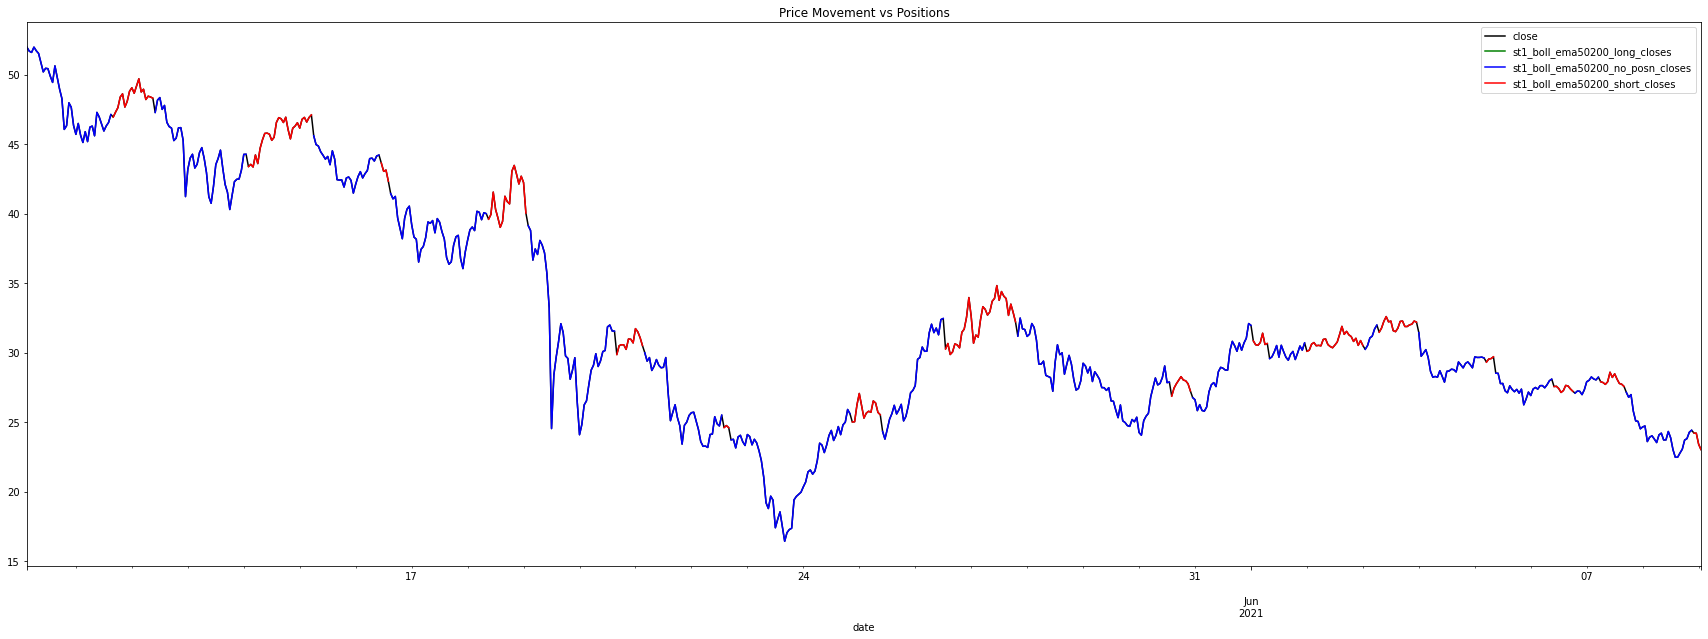

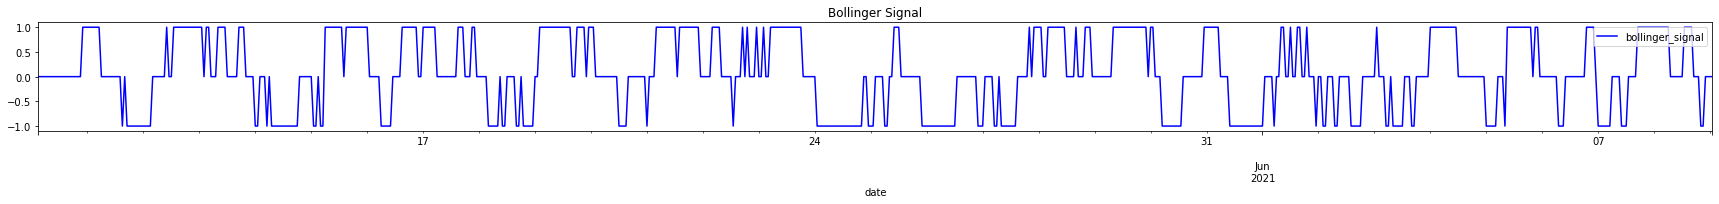

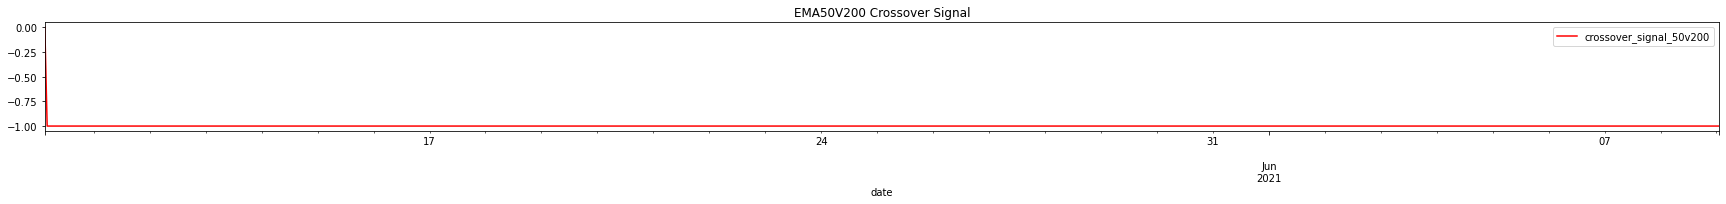

In [71]:
# PLOT IN MATPLOTLIB

display(strategy_1[['close', 'st1_boll_ema50200_long_closes', 'st1_boll_ema50200_no_posn_closes', 'st1_boll_ema50200_short_closes']].plot(figsize=(30,10), color=['k', 'g', 'b', 'r']))
plt.title('Price Movement vs Positions')
display(strategy_1[['bollinger_signal']].plot(figsize=(30,2), color=['b']))
plt.title('Bollinger Signal')
display(strategy_1[['crossover_signal_50v200']].plot(figsize=(30,2), color=['r']))
plt.title('EMA50V200 Crossover Signal')

## Strategy 2 - RSI + MACD

In [39]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']

historical_prices_df[st2_x_var_list].head(20)

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   
2021-05-10 08:00:00  51.52213         0.0         -1.0   
2021-05-10 09:00:00  50.85370         0.0         -1.0   
2021-05-10 10:00:00  50.19934         0.0         -1.0   
2021-05-10 11:00:00  50.45710         0.0         -1.0   
2021-05-10 12:00:00  50.42942         0.0         -1.0   
2021-05-10 13:00:00  49.89203         0.0         -1.0   
2021-05-10 14:00:00  49.44167         0.0         -1.0   
2021-05-10 15:00:00  50.63303         0.0         -1.0   
2021-05-10 16:00:00  49.79332         0.0         -1.0   
2021-05-10 17:00:00  48.95640         1.0         -1.0   
2021-05-10 18:00:00  48.27648         1.0         -1.0   
2021-05-10 19:00:00  46.05948         1.0         -1.0   
2021-05-10 20:00:00  46.32462         1.0         -1.0   
2021-05-10 21:00:00  47.97513         1.0         -1.0   
2021-05-10 22:00:00  47.64895         1.0         -1.0   

                     macd_conservative_long_exit  macd_conservative_short_exit  
date                                                                            
2021-05-10 03:00:00                          0.0                           0.0  
2021-05-10 04:00:00                         -1.0                           0.0  
2021-05-10 05:00:00                          0.0                           1.0  
2021-05-10 06:00:00                         -1.0                           0.0  
2021-05-10 07:00:00                          0.0                           1.0  
2021-05-10 08:00:00                          0.0                           1.0  
2021-05-10 09:00:00                          0.0                           1.0  
2021-05-10 10:00:00                          0.0                           1.0  
2021-05-10 11:00:00                          0.0                           1.0  
2021-05-10 12:00:00                          0.0                           1.0  
2021-05-10 13:00:00                          0.0                           1.0  
2021-05-10 14:00:00                          0.0                           1.0  
2021-05-10 15:00:00                         -1.0                           0.0  
2021-05-10 16:00:00                         -1.0                           0.0  
2021-05-10 17:00:00                          0.0                           1.0  
2021-05-10 18:00:00                          0.0                           1.0  
2021-05-10 19:00:00                          0.0                           1.0  
2021-05-10 20:00:00                          0.0                           1.0  
2021-05-10 21:00:00                         -1.0                           0.0  
2021-05-10 22:00:00                         -1.0                           0.0

In [40]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 53)

In [41]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-12 05:00:00  48.94800         0.0          1.0   
2021-05-12 06:00:00  48.21088         0.0          1.0   
2021-05-12 07:00:00  48.45093         0.0          1.0   
2021-05-12 08:00:00  48.39182         0.0          1.0   
2021-05-12 09:00:00  48.30960         0.0          1.0   
2021-05-12 10:00:00  47.27648         0.0         -1.0   
2021-05-12 11:00:00  48.17051         0.0         -1.0   
2021-05-12 12:00:00  48.35014         0.0         -1.0   
2021-05-12 13:00:00  47.50000         0.0         -1.0   
2021-05-12 14:00:00  47.78614         0.0         -1.0   
2021-05-12 15:00:00  46.57310         0.0         -1.0   
2021-05-12 16:00:00  46.26211         0.0         -1.0   
2021-05-12 17:00:00  46.15639         0.0         -1.0   
2021-05-12 18:00:00  45.25612         0.0         -1.0   
2021-05-12 19:00:00  45.43140         0.0         -1.0   
2021-05-12 20:00:00  46.17338         0.0         -1.0   
2021-05-12 21:00:00  46.18717         0.0         -1.0   
2021-05-12 22:00:00  45.26291         0.0         -1.0   
2021-05-12 23:00:00  41.22566         1.0         -1.0   
2021-05-13 00:00:00  43.18796         1.0         -1.0   
2021-05-13 01:00:00  43.99578         1.0         -1.0   
2021-05-13 02:00:00  44.27236         1.0         -1.0   
2021-05-13 03:00:00  43.28022         1.0         -1.0   
2021-05-13 04:00:00  43.55515         1.0         -1.0   
2021-05-13 05:00:00  44.38671         1.0         -1.0   
2021-05-13 06:00:00  44.74971         1.0         -1.0   
2021-05-13 07:00:00  43.99000         1.0          1.0   
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   
2021-05-13 16:00:00  42.10000         0.0          1.0   
2021-05-13 17:00:00  41.53864         0.0          1.0   
2021-05-13 18:00:00  40.29654         0.0         -1.0   
2021-05-13 19:00:00  41.32421         0.0         -1.0   
2021-05-13 20:00:00  42.30095         0.0         -1.0   
2021-05-13 21:00:00  42.47000         0.0          1.0   
2021-05-13 22:00:00  42.49652         0.0          1.0   
2021-05-13 23:00:00  43.14226         0.0          1.0   
2021-05-14 00:00:00  44.26324         0.0          1.0   
2021-05-14 01:00:00  44.27103         0.0          1.0   
2021-05-14 02:00:00  43.38080         0.0          1.0   
2021-05-14 03:00:00  43.54596         0.0          1.0   
2021-05-14 04:00:00  43.35558         0.0          1.0   
2021-05-14 05:00:00  44.22125         0.0          1.0   
2021-05-14 06:00:00  43.60051         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-12 05:00:00                         -1.0   
2021-05-12 06:00:00                         -1.0   
2021-05-12 07:00:00                         -1.0   
2021-05-12 08:00:00                         -1.0   
2021-05-12 09:00:00                         -1.0   
2021-05-12 10:00:00                         -1.0   
2021-05-12 11:00:00                         -1.0   
2021-05-12 12:00:00                         -1.0   
2021-05-12 13:00:00                          0.0   
2021-05-12 14:00:00                          0.0   
2021-05-12 15:00:00                          0.0   
2021-05-12 16:00:00                          0.0   
2021-05-12 17:00:00                          0.0   
2021-05-12 18:00:00                          0.0   
2021-05-12 19:00:00                          0.0   
2021-05-12 20:00:00                         -1.0   
2021-05-12 21:00:00                         -1.0   
2021-05-12 22:00:00

In [42]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  
date                                    
2021-05-10 03:00:00                NaN  
2021-05-10 04:00:00                0.0  
2021-05-10 05:00:00               -1.0  
2021-05-10 06:00:00               -1.0  
2021-05-10 07:00:00               -1.0

### Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [43]:
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():


    ## RSI OVERSOLD SCENARIOS


    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    


    ## RSI OVERBOUGHT SCENARIOS


    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)



    ## RSI FAIR SCENARIOS


    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)


    ## OTHER



    # ELSE : 0 / NA
    else:
        st2_position_code = st2_position_code
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 7)

(719, 53)

In [44]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['st2_rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
# strategy_2[400:450]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  
date                                                           
2021-05-10 03:00:00                NaN                      0  
2021-05-10 04:00:00                0.0                      0  
2021-05-10 05:00:00               -1.0                      0  
2021-05-10 06:00:00               -1.0                      0  
2021-05-10 07:00:00               -1.0                      0

In [45]:
strategy_2['rsi_macd_agg_position_shift'] = strategy_2['rsi_macd_agg_position'].shift(1)
# strategy_2[50:100]
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-10 03:00:00                NaN                      0   
2021-05-10 04:00:00                0.0                      0   
2021-05-10 05:00:00               -1.0                      0   
2021-05-10 06:00:00               -1.0                      0   
2021-05-10 07:00:00               -1.0                      0   

                     rsi_macd_agg_position_shift  
date                                              
2021-05-10 03:00:00                          NaN  
2021-05-10 04:00:00                          0.0  
2021-05-10 05:00:00                          0.0  
2021-05-10 06:00:00                          0.0  
2021-05-10 07:00:00                          0.0

In [46]:
st2_signal = 'NA'
st2_signal_text = 'No Position - hold'
st2_signals = []

for index, row in strategy_2.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short'
        st2_signals.append(st2_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long'
        st2_signals.append(st2_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'No Position - hold'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Sell Short'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Hold Short Position'
        st2_signals.append(st2_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = '‘Close Long Position, Enter short Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Hold Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short Position, Enter Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Enter Long Position'
        st2_signals.append(st2_signal_text)


    # Else, Signal = none
    else:
        st2_signal_text = st2_signal_text
        st2_signals.append(st2_signal_text)


strategy_2['rsi_macd_agg_signals'] = st2_signals
historical_prices_df['st2_rsi_macd_agg_signals'] = st2_signals
strategy_2.head()

close  rsi_signal  macd_signal  \
date                                                     
2021-05-10 03:00:00  51.96999         0.0          0.0   
2021-05-10 04:00:00  51.68809         0.0         -1.0   
2021-05-10 05:00:00  51.60000         0.0         -1.0   
2021-05-10 06:00:00  51.98208         0.0         -1.0   
2021-05-10 07:00:00  51.72000         0.0         -1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-10 03:00:00                          0.0   
2021-05-10 04:00:00                         -1.0   
2021-05-10 05:00:00                          0.0   
2021-05-10 06:00:00                         -1.0   
2021-05-10 07:00:00                          0.0   

                     macd_conservative_short_exit  rsi_window  \
date                                                            
2021-05-10 03:00:00                           0.0  Fair price   
2021-05-10 04:00:00                           0.0  Fair price   
2021-05-10 05:00:00                           1.0  Fair price   
2021-05-10 06:00:00                           0.0  Fair price   
2021-05-10 07:00:00                           1.0  Fair price   

                     macd_signal_shift  rsi_macd_agg_position  \
date                                                            
2021-05-10 03:00:00                NaN                      0   
2021-05-10 04:00:00                0.0                      0   
2021-05-10 05:00:00               -1.0                      0   
2021-05-10 06:00:00               -1.0                      0   
2021-05-10 07:00:00               -1.0                      0   

                     rsi_macd_agg_position_shift rsi_macd_agg_signals  
date                                                                   
2021-05-10 03:00:00                          NaN   No Position - hold  
2021-05-10 04:00:00                          0.0   No Position - hold  
2021-05-10 05:00:00                          0.0   No Position - hold  
2021-05-10 06:00:00                          0.0   No Position - hold  
2021-05-10 07:00:00                          0.0   No Position - hold

In [47]:
# st2_long_position_closes = []
# st2_no_position_closes = []
# st2_short_position_closes = []

# st2_long_position_close = np.nan
# st2_no_position_close = np.nan
# st2_short_position_close = np.nan

# for index, row in strategy_2.iterrows():

#     # LONG / Position == 1, close = green
#     if (row['rsi_macd_agg_position'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)

#     # LONG / Position != 1 & Position_shift == 1, close = green
#     elif (row['rsi_macd_agg_position'] != 1) & (row['rsi_macd_agg_position_shift'] == 1):
#         st2_long_position_closes = row['close']
#         # st2_long_position_closes.append(st2_long_position_close)


#     # NOPOSN / Position == 0, close = blue
#     elif (row['rsi_macd_agg_position'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # NOPOSN / Position != 0 & Position_shift == 0, close = blue
#     elif (row['rsi_macd_agg_position'] != 0) & (row['rsi_macd_agg_position_shift'] == 0):
#         st2_no_position_closes = row['close']
#         # st2_no_position_closes.append(st2_no_position_close)


#     # SHORT / Position == -1, close = red
#     if (row['rsi_macd_agg_position'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


#     # SHORT / Position != -1 & Position_shift == -1, close = blue
#     elif (row['rsi_macd_agg_position'] != -1) & (row['rsi_macd_agg_position_shift'] == -1):
#         st2_short_position_closes = row['close']
#         # st2_short_position_closes.append(st2_short_position_close)


# strategy_2['rsi_macd_long_closes'] = st2_long_position_closes
# strategy_2['rsi_macd_no_posn_closes'] = st2_no_position_closes
# strategy_2['rsi_macd_short_closes'] = st2_short_position_closes


strategy_2['rsi_macd_long_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 1, strategy_2['close'], np.nan)
strategy_2['rsi_macd_no_posn_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == 0, strategy_2['close'], np.nan)
strategy_2['rsi_macd_short_closes'] = np.where(strategy_2['rsi_macd_agg_position'] == -1, strategy_2['close'], np.nan)
strategy_2[50:100]

close  rsi_signal  macd_signal  \
date                                                     
2021-05-12 05:00:00  48.94800         0.0          1.0   
2021-05-12 06:00:00  48.21088         0.0          1.0   
2021-05-12 07:00:00  48.45093         0.0          1.0   
2021-05-12 08:00:00  48.39182         0.0          1.0   
2021-05-12 09:00:00  48.30960         0.0          1.0   
2021-05-12 10:00:00  47.27648         0.0         -1.0   
2021-05-12 11:00:00  48.17051         0.0         -1.0   
2021-05-12 12:00:00  48.35014         0.0         -1.0   
2021-05-12 13:00:00  47.50000         0.0         -1.0   
2021-05-12 14:00:00  47.78614         0.0         -1.0   
2021-05-12 15:00:00  46.57310         0.0         -1.0   
2021-05-12 16:00:00  46.26211         0.0         -1.0   
2021-05-12 17:00:00  46.15639         0.0         -1.0   
2021-05-12 18:00:00  45.25612         0.0         -1.0   
2021-05-12 19:00:00  45.43140         0.0         -1.0   
2021-05-12 20:00:00  46.17338         0.0         -1.0   
2021-05-12 21:00:00  46.18717         0.0         -1.0   
2021-05-12 22:00:00  45.26291         0.0         -1.0   
2021-05-12 23:00:00  41.22566         1.0         -1.0   
2021-05-13 00:00:00  43.18796         1.0         -1.0   
2021-05-13 01:00:00  43.99578         1.0         -1.0   
2021-05-13 02:00:00  44.27236         1.0         -1.0   
2021-05-13 03:00:00  43.28022         1.0         -1.0   
2021-05-13 04:00:00  43.55515         1.0         -1.0   
2021-05-13 05:00:00  44.38671         1.0         -1.0   
2021-05-13 06:00:00  44.74971         1.0         -1.0   
2021-05-13 07:00:00  43.99000         1.0          1.0   
2021-05-13 08:00:00  42.95477         1.0         -1.0   
2021-05-13 09:00:00  41.22402         1.0         -1.0   
2021-05-13 10:00:00  40.74371         1.0         -1.0   
2021-05-13 11:00:00  41.95278         1.0         -1.0   
2021-05-13 12:00:00  43.52829         1.0         -1.0   
2021-05-13 13:00:00  43.96705         1.0          1.0   
2021-05-13 14:00:00  44.56894         0.0          1.0   
2021-05-13 15:00:00  43.25543         0.0          1.0   
2021-05-13 16:00:00  42.10000         0.0          1.0   
2021-05-13 17:00:00  41.53864         0.0          1.0   
2021-05-13 18:00:00  40.29654         0.0         -1.0   
2021-05-13 19:00:00  41.32421         0.0         -1.0   
2021-05-13 20:00:00  42.30095         0.0         -1.0   
2021-05-13 21:00:00  42.47000         0.0          1.0   
2021-05-13 22:00:00  42.49652         0.0          1.0   
2021-05-13 23:00:00  43.14226         0.0          1.0   
2021-05-14 00:00:00  44.26324         0.0          1.0   
2021-05-14 01:00:00  44.27103         0.0          1.0   
2021-05-14 02:00:00  43.38080         0.0          1.0   
2021-05-14 03:00:00  43.54596         0.0          1.0   
2021-05-14 04:00:00  43.35558         0.0          1.0   
2021-05-14 05:00:00  44.22125         0.0          1.0   
2021-05-14 06:00:00  43.60051         0.0          1.0   

                     macd_conservative_long_exit  \
date                                               
2021-05-12 05:00:00                         -1.0   
2021-05-12 06:00:00                         -1.0   
2021-05-12 07:00:00                         -1.0   
2021-05-12 08:00:00                         -1.0   
2021-05-12 09:00:00                         -1.0   
2021-05-12 10:00:00                         -1.0   
2021-05-12 11:00:00                         -1.0   
2021-05-12 12:00:00                         -1.0   
2021-05-12 13:00:00                          0.0   
2021-05-12 14:00:00                          0.0   
2021-05-12 15:00:00                          0.0   
2021-05-12 16:00:00                          0.0   
2021-05-12 17:00:00                          0.0   
2021-05-12 18:00:00                          0.0   
2021-05-12 19:00:00                          0.0   
2021-05-12 20:00:00                         -1.0   
2021-05-12 21:00:00                         -1.0   
2021-05-12 22:00:00

In [48]:
## BUILDING CODE FOR MAIN GRAPH __________________________________________

# # Visualize st2_exit position relative to close price
# st2_exit = strategy_2[strategy_2['rsi_macd_agg_position'] == -1.0]['close'].hvplot.scatter(
#     color='red',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_no_posn = strategy_2[strategy_2['rsi_macd_agg_position'] == 0]['close'].hvplot.scatter(
#     color='BLUE',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# # Visualize st2_entry position relative to close price
# st2_entry = strategy_2[strategy_2['rsi_macd_agg_position'] == 1.0]['close'].hvplot.scatter(
#     color='green',
#     marker='^',
#     size=50,
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

# Visualize close price for the investment
price_closes = strategy_2[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_2['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_2['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_2['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
# moving_avgs = strategy_2[['SMA50', 'SMA100']].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400
# )

## CODE FOR SIGNALS GRAPHS __________________________________________



rsi_signals = historical_prices_df['rsi_signal'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_signals = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

## CODE FOR DISPLAYING ALL GRAPHS __________________________________________

# Overlay plots
# entry_st2_exit_plot = price_closes * st2_entry * st2_no_posn * st2_exit * long_closes * noposn_closes * short_closes
entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))

display(rsi_signals.opts(xaxis=None))
display(macd_signals.opts(xaxis=None))




# strategy_2.hvplot(x='date', y='close', kind='line')

:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (rsi_signal)

:Curve   [date]   (macd_signal)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'MACD Crossover Signal')

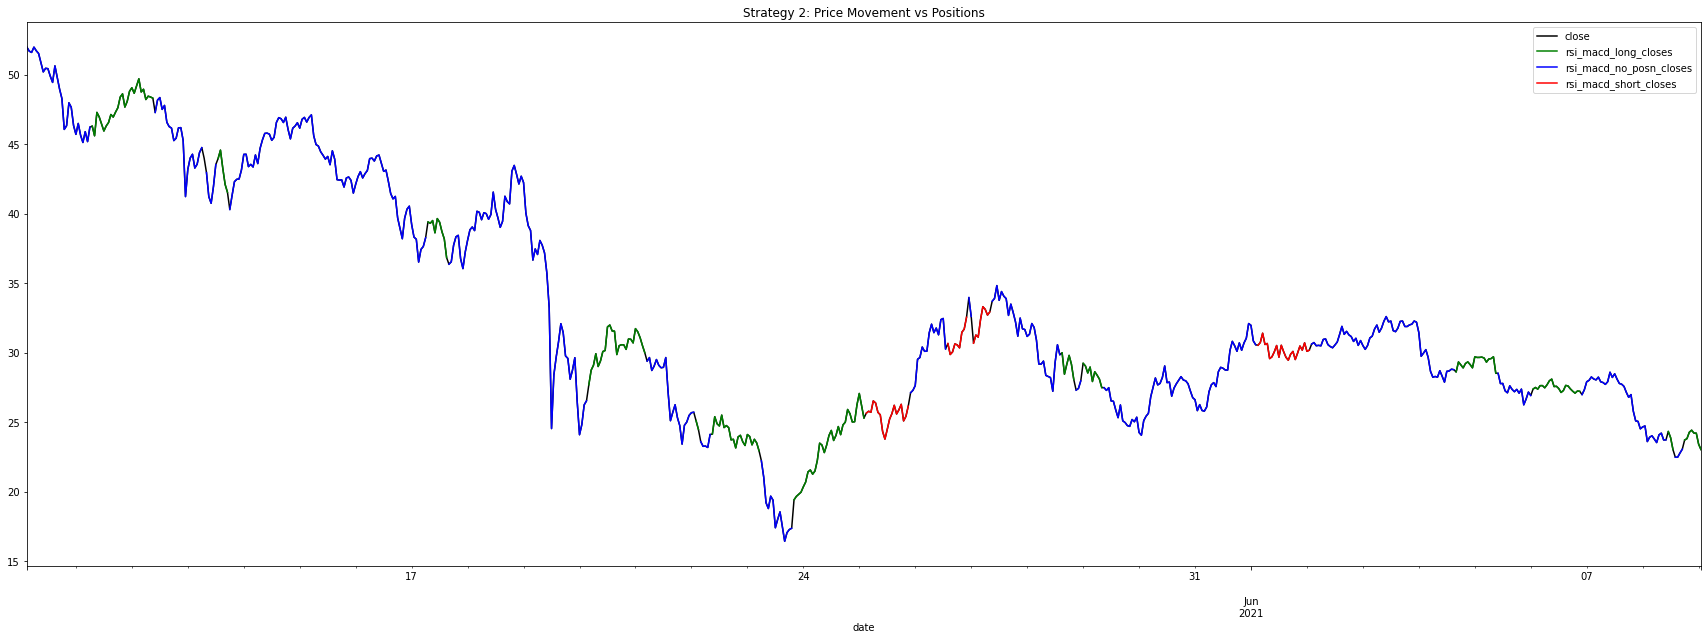

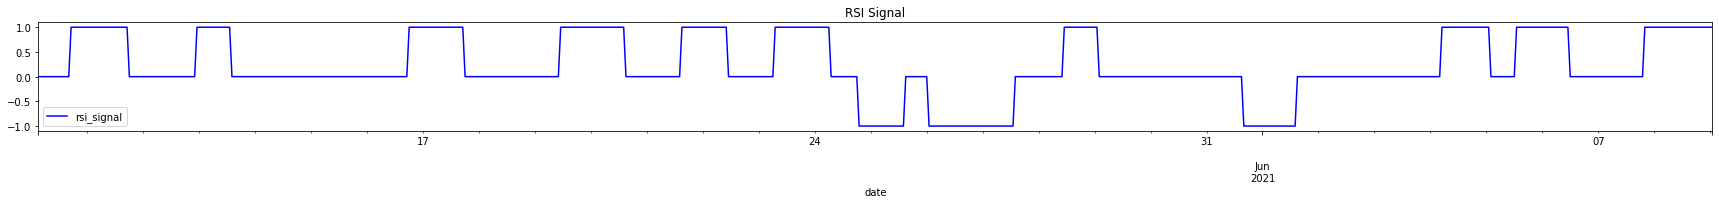

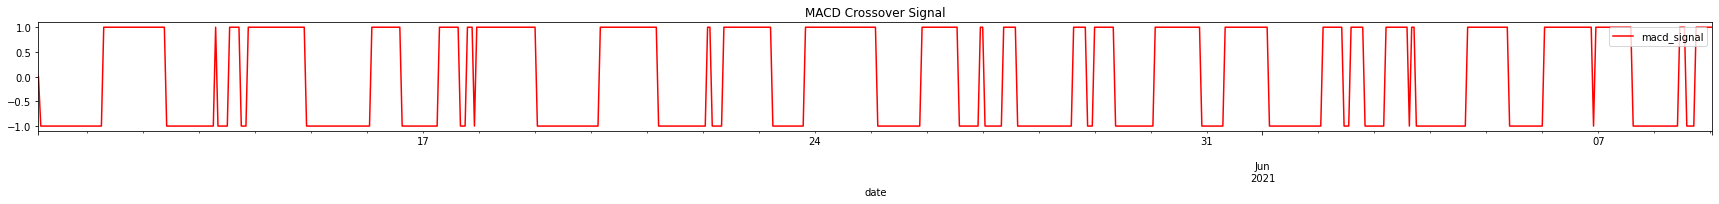

In [72]:
# PLOT IN MATPLOTLIB

display(strategy_2[['close', 'rsi_macd_long_closes', 'rsi_macd_no_posn_closes', 'rsi_macd_short_closes']].plot(figsize=(30,10), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 2: Price Movement vs Positions')
display(strategy_2[['rsi_signal']].plot(figsize=(30,2), color=['b']))
plt.title('RSI Signal')
display(strategy_2[['macd_signal']].plot(figsize=(30,2), color=['r']))
plt.title('MACD Crossover Signal')

## Strategy 3 - EMA50V200 + MACD

In [49]:
historical_prices_df[st3_x_var_list].iloc[550:570]
historical_prices_df.shape

(719, 55)

In [50]:
# Filter by x-variable list
strategy_3 = historical_prices_df[st3_x_var_list]

# Define long and short position conditions
strategy_3['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_3.iloc[509:528]
strategy_3['macd_signal_shift'] = strategy_3['macd_signal'].shift(1)

strategy_3.head(5)

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  
date                                                 
2021-05-10 03:00:00         Bull                NaN  
2021-05-10 04:00:00         Bear                0.0  
2021-05-10 05:00:00         Bear               -1.0  
2021-05-10 06:00:00         Bear               -1.0  
2021-05-10 07:00:00         Bear               -1.0

In [51]:
strategy_3.shape

(719, 5)

## Program the Conditional Logic for the Trading Strategy

In [52]:
st3_position_code = 0
st3_positions = []

for index, row in strategy_3.iterrows():
    
    # If EMA50v200 = 1 (BULL) and MACD CROSSES ABOVE SIGNAL (1) BUY
    if (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 1
        st3_positions.append(st3_position_code)


    # If EMA50v200 = 1 (BULL) and MACD CROSSES BELOW SIGNAL (-1) No Position
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)


    # If EMA50v200 = -1 (BEAR) and MACD CROSSES ABOVE SIGNAL (1) No Position
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] != 1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)



    # If EMA50v200 = -1 (BEAR) and MACD CROSSES BELOW SIGNAL (-1) SELL
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] != -1):
        st3_position_code = -1
        st3_positions.append(st3_position_code)


    # ELSE : 0 / NA
    else:
        st3_position_code = st3_position_code
        st3_positions.append(st3_position_code)

    

# Double check the dataframes have the same row lengths
display(len(st3_positions))
display(strategy_3.shape)
display(historical_prices_df.shape)    

719

(719, 5)

(719, 55)

In [53]:
strategy_3['ema50200_macd_position'] = st3_positions
historical_prices_df['st3_ema50200_macd_position'] = st3_positions
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  
date                                                                         
2021-05-10 03:00:00         Bull                NaN                       0  
2021-05-10 04:00:00         Bear                0.0                      -1  
2021-05-10 05:00:00         Bear               -1.0                      -1  
2021-05-10 06:00:00         Bear               -1.0                      -1  
2021-05-10 07:00:00         Bear               -1.0                      -1

### CALCULATE SIGNALS

In [54]:
strategy_3['ema50200_macd_position_shift'] = strategy_3['ema50200_macd_position'].shift(1)
strategy_3

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   
...                       ...                      ...          ...   
2021-06-08 21:00:00  24.41741                     -1.0          1.0   
2021-06-08 22:00:00  24.20817                     -1.0          1.0   
2021-06-08 23:00:00  24.20062                     -1.0          1.0   
2021-06-09 00:00:00  23.41281                     -1.0          1.0   
2021-06-09 01:00:00  23.02404                     -1.0          1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-10 03:00:00         Bull                NaN                       0   
2021-05-10 04:00:00         Bear                0.0                      -1   
2021-05-10 05:00:00         Bear               -1.0                      -1   
2021-05-10 06:00:00         Bear               -1.0                      -1   
2021-05-10 07:00:00         Bear               -1.0                      -1   
...                          ...                ...                     ...   
2021-06-08 21:00:00         Bear                1.0                       0   
2021-06-08 22:00:00         Bear                1.0                       0   
2021-06-08 23:00:00         Bear                1.0                       0   
2021-06-09 00:00:00         Bear                1.0                       0   
2021-06-09 01:00:00         Bear                1.0                       0   

                     ema50200_macd_position_shift  
date                                               
2021-05-10 03:00:00                           NaN  
2021-05-10 04:00:00                           0.0  
2021-05-10 05:00:00                          -1.0  
2021-05-10 06:00:00                          -1.0  
2021-05-10 07:00:00                          -1.0  
...                                           ...  
2021-06-08 21:00:00                           0.0  
2021-06-08 22:00:00                           0.0  
2021-06-08 23:00:00                           0.0  
2021-06-09 00:00:00                           0.0  
2021-06-09 01:00:00                           0.0  

[719 rows x 7 columns]

In [55]:
st3_signal_text = 'No Position - hold'
st3_signals = []

for index, row in strategy_3.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short'
        st3_signals.append(st3_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long'
        st3_signals.append(st3_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'No Position - hold'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Sell Short'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Hold Short Position'
        st3_signals.append(st3_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = '‘Close Long Position, Enter short Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Hold Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short Position, Enter Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Enter Long Position'
        st3_signals.append(st3_signal_text)


    # Else, Signal = none
    else:
        st3_signal_text = st3_signal_text
        st3_signals.append(st3_signal_text)


strategy_3['ema50200_macd_signal'] = st3_signals
historical_prices_df['st3_rsi_macd_agg_signals'] = st3_signals
# strategy_3[0:50]
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-10 03:00:00         Bull                NaN                       0   
2021-05-10 04:00:00         Bear                0.0                      -1   
2021-05-10 05:00:00         Bear               -1.0                      -1   
2021-05-10 06:00:00         Bear               -1.0                      -1   
2021-05-10 07:00:00         Bear               -1.0                      -1   

                     ema50200_macd_position_shift ema50200_macd_signal  
date                                                                    
2021-05-10 03:00:00                           NaN   No Position - hold  
2021-05-10 04:00:00                           0.0           Sell Short  
2021-05-10 05:00:00                          -1.0  Hold Short Position  
2021-05-10 06:00:00                          -1.0  Hold Short Position  
2021-05-10 07:00:00                          -1.0  Hold Short Position

In [56]:
strategy_3['ema50v200_macd_long_closes'] = np.where(strategy_3['ema50200_macd_position'] == 1, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_no_posn_closes'] = np.where(strategy_3['ema50200_macd_position'] == 0, strategy_3['close'], np.nan)
strategy_3['ema50v200_macd_short_closes'] = np.where(strategy_3['ema50200_macd_position'] == -1, strategy_3['close'], np.nan)
# strategy_3[50:100]
strategy_3.head()

close  crossover_signal_50v200  macd_signal  \
date                                                                  
2021-05-10 03:00:00  51.96999                      0.0          0.0   
2021-05-10 04:00:00  51.68809                     -1.0         -1.0   
2021-05-10 05:00:00  51.60000                     -1.0         -1.0   
2021-05-10 06:00:00  51.98208                     -1.0         -1.0   
2021-05-10 07:00:00  51.72000                     -1.0         -1.0   

                    bull_or_bear  macd_signal_shift  ema50200_macd_position  \
date                                                                          
2021-05-10 03:00:00         Bull                NaN                       0   
2021-05-10 04:00:00         Bear                0.0                      -1   
2021-05-10 05:00:00         Bear               -1.0                      -1   
2021-05-10 06:00:00         Bear               -1.0                      -1   
2021-05-10 07:00:00         Bear               -1.0                      -1   

                     ema50200_macd_position_shift ema50200_macd_signal  \
date                                                                     
2021-05-10 03:00:00                           NaN   No Position - hold   
2021-05-10 04:00:00                           0.0           Sell Short   
2021-05-10 05:00:00                          -1.0  Hold Short Position   
2021-05-10 06:00:00                          -1.0  Hold Short Position   
2021-05-10 07:00:00                          -1.0  Hold Short Position   

                     ema50v200_macd_long_closes  \
date                                              
2021-05-10 03:00:00                         NaN   
2021-05-10 04:00:00                         NaN   
2021-05-10 05:00:00                         NaN   
2021-05-10 06:00:00                         NaN   
2021-05-10 07:00:00                         NaN   

                     ema50v200_macd_no_posn_closes  \
date                                                 
2021-05-10 03:00:00                       51.96999   
2021-05-10 04:00:00                            NaN   
2021-05-10 05:00:00                            NaN   
2021-05-10 06:00:00                            NaN   
2021-05-10 07:00:00                            NaN   

                     ema50v200_macd_short_closes  
date                                              
2021-05-10 03:00:00                          NaN  
2021-05-10 04:00:00                     51.68809  
2021-05-10 05:00:00                     51.60000  
2021-05-10 06:00:00                     51.98208  
2021-05-10 07:00:00                     51.72000

In [57]:

# _________________ BUILDING MAIN GRAPH YO _________________ #

# Visualize close price for the investment
price_closes = strategy_3[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_3['ema50v200_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_3['ema50v200_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_3['ema50v200_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ OTHER SIGNAL CODE _________________ #

ema50v200sig = historical_prices_df['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

macd_sig = historical_prices_df['macd_signal'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# _________________ CALLING THE GRAPHS SON _________________ #

entry_st3_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st3_exit_plot.opts(xaxis=None))
display(ema50v200sig.opts(xaxis=None))
display(macd_sig.opts(xaxis=None))

:Overlay
   .Curve.I                             :Curve   [date]   (close)
   .Curve.Ema50v200_macd_long_closes    :Curve   [date]   (ema50v200_macd_long_closes)
   .Curve.Ema50v200_macd_no_posn_closes :Curve   [date]   (ema50v200_macd_no_posn_closes)
   .Curve.Ema50v200_macd_short_closes   :Curve   [date]   (ema50v200_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (macd_signal)

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'MACD Crossover Signal')

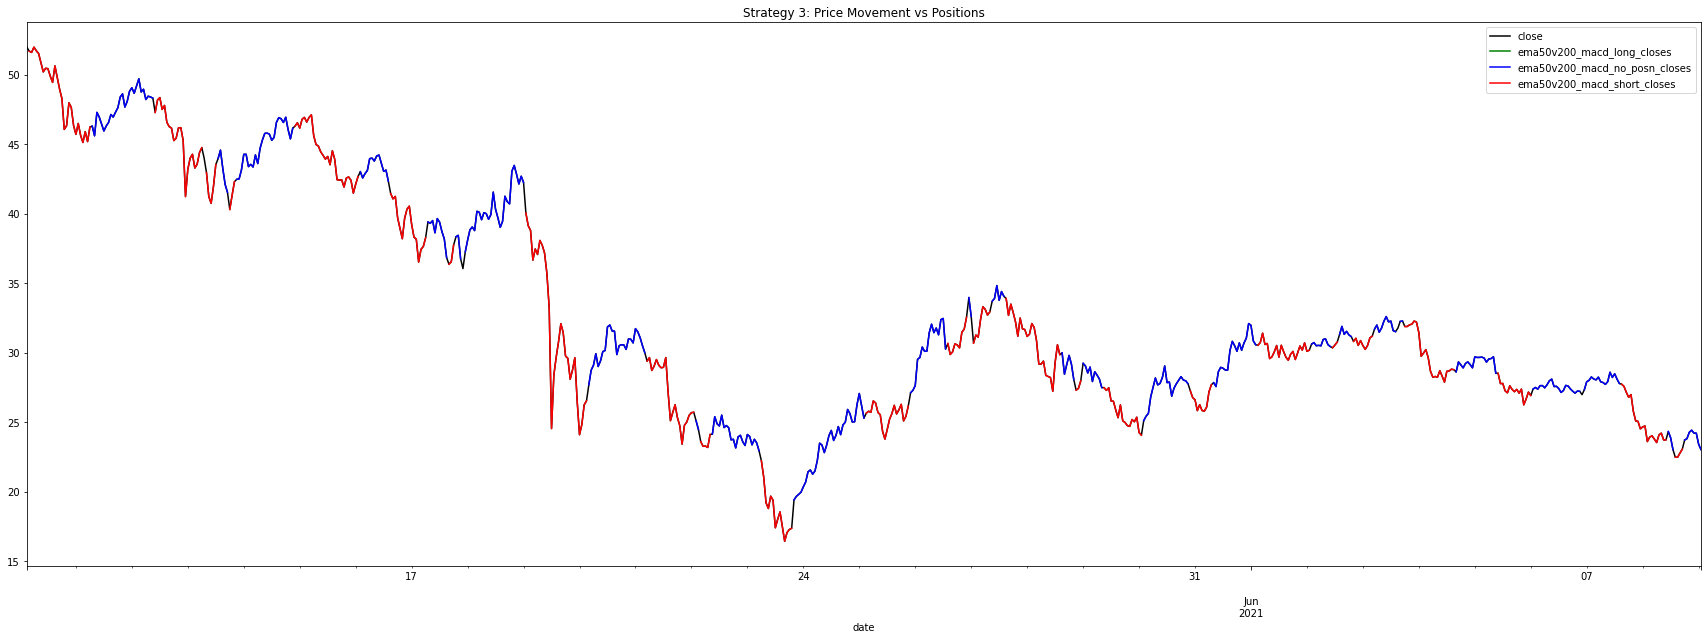

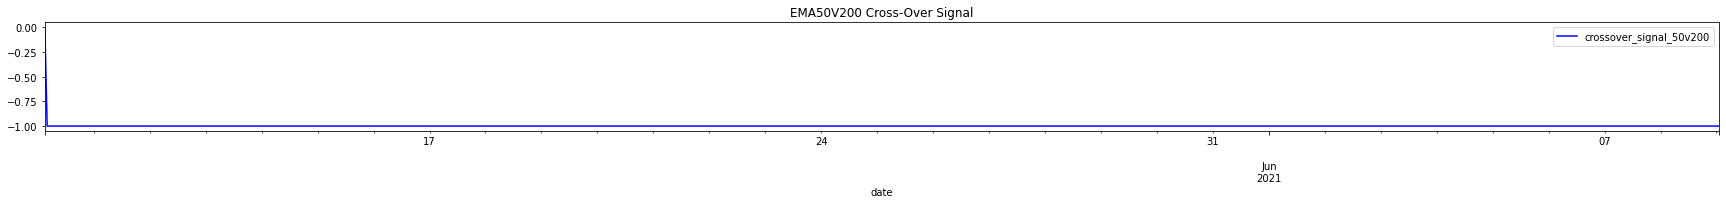

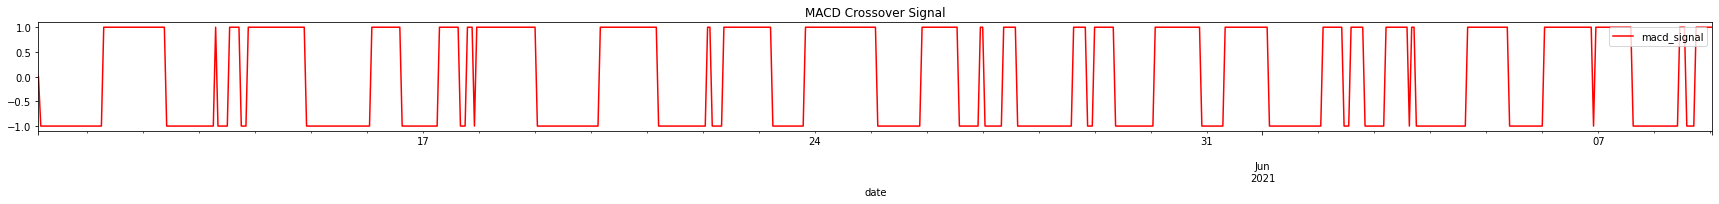

In [73]:
# PLOT IN MATPLOTLIB

display(strategy_3[['close', 'ema50v200_macd_long_closes', 'ema50v200_macd_no_posn_closes', 'ema50v200_macd_short_closes']].plot(figsize=(30,10), color=['k', 'g', 'b', 'r']))
plt.title('Strategy 3: Price Movement vs Positions')
display(strategy_3[['crossover_signal_50v200']].plot(figsize=(30,2), color=['b']))
plt.title('EMA50V200 Cross-Over Signal')
display(strategy_3[['macd_signal']].plot(figsize=(30,2), color=['r']))
plt.title('MACD Crossover Signal')

## Strategy 4 - EMA200v50 + EMA200v50

In [58]:
# Filter by x-variable list
strategy_4 = historical_prices_df[st4_x_var_list]

# Define long and short position conditions
strategy_4['ema50v200_bull_or_bear'] = np.where(strategy_4['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_4.iloc[509:528]
strategy_4.tail(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-08 21:00:00  24.41741                     -1.0                   -1.0   
2021-06-08 22:00:00  24.20817                     -1.0                   -1.0   
2021-06-08 23:00:00  24.20062                     -1.0                   -1.0   
2021-06-09 00:00:00  23.41281                     -1.0                   -1.0   
2021-06-09 01:00:00  23.02404                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  
date                                        
2021-06-08 21:00:00                   Bear  
2021-06-08 22:00:00                   Bear  
2021-06-08 23:00:00                   Bear  
2021-06-09 00:00:00                   Bear  
2021-06-09 01:00:00                   Bear

## Program the Conditional Logic for the Trading Strategy

In [59]:
# Istantiate variables 
st4_position_code = 0
st4_positions = []

for index, row in strategy_4.iterrows():


    # IF BEAR (50v200 = -1) AND EMA9v20 = 1 : NO POSITION (Position = 0)
    if (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # IF BEAR (50v200 = -1) AND EMA9v20 = -1 : SHORT (Position = -1)
    elif (row['crossover_signal_50v200'] == -1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = -1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = 1 : LONG (Position = 1)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == 1):
        st4_position_code = 1
        st4_positions.append(st4_position_code)

    # IF BULL (50v200 = 1) AND EMA9v20 = -1 : NO POSITION (Position = 0)
    elif (row['crossover_signal_50v200'] == 1) & (row['crossover_signal_9v20'] == -1):
        st4_position_code = 0
        st4_positions.append(st4_position_code)

    # ELSE
    else:
        st4_position_code = st4_position_code
        st4_positions.append(st4_position_code)

# Double check the dataframes have the same row lengths
display(len(st4_positions))
display(strategy_4.shape)
display(historical_prices_df.shape)

719

(719, 4)

(719, 57)

In [60]:
strategy_4['st4_ema200v50_ema9v20'] = st4_positions
historical_prices_df['st4_st4_ema200v50_ema9v20'] = st4_positions
# strategy_4[130:170]
strategy_4[695:830]

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-06-08 02:00:00  23.59819                     -1.0                   -1.0   
2021-06-08 03:00:00  23.91422                     -1.0                   -1.0   
2021-06-08 04:00:00  24.01202                     -1.0                   -1.0   
2021-06-08 05:00:00  23.77886                     -1.0                   -1.0   
2021-06-08 06:00:00  23.52668                     -1.0                   -1.0   
2021-06-08 07:00:00  24.08114                     -1.0                   -1.0   
2021-06-08 08:00:00  24.20431                     -1.0                   -1.0   
2021-06-08 09:00:00  23.71481                     -1.0                   -1.0   
2021-06-08 10:00:00  23.71981                     -1.0                   -1.0   
2021-06-08 11:00:00  24.32365                     -1.0                   -1.0   
2021-06-08 12:00:00  23.87108                     -1.0                   -1.0   
2021-06-08 13:00:00  23.02143                     -1.0                   -1.0   
2021-06-08 14:00:00  22.46968                     -1.0                   -1.0   
2021-06-08 15:00:00  22.46928                     -1.0                   -1.0   
2021-06-08 16:00:00  22.77237                     -1.0                   -1.0   
2021-06-08 17:00:00  23.05031                     -1.0                   -1.0   
2021-06-08 18:00:00  23.70662                     -1.0                   -1.0   
2021-06-08 19:00:00  23.80893                     -1.0                   -1.0   
2021-06-08 20:00:00  24.26666                     -1.0                   -1.0   
2021-06-08 21:00:00  24.41741                     -1.0                   -1.0   
2021-06-08 22:00:00  24.20817                     -1.0                   -1.0   
2021-06-08 23:00:00  24.20062                     -1.0                   -1.0   
2021-06-09 00:00:00  23.41281                     -1.0                   -1.0   
2021-06-09 01:00:00  23.02404                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  
date                                                               
2021-06-08 02:00:00                   Bear                     -1  
2021-06-08 03:00:00                   Bear                     -1  
2021-06-08 04:00:00                   Bear                     -1  
2021-06-08 05:00:00                   Bear                     -1  
2021-06-08 06:00:00                   Bear                     -1  
2021-06-08 07:00:00                   Bear                     -1  
2021-06-08 08:00:00                   Bear                     -1  
2021-06-08 09:00:00                   Bear                     -1  
2021-06-08 10:00:00                   Bear                     -1  
2021-06-08 11:00:00                   Bear                     -1  
2021-06-08 12:00:00                   Bear                     -1  
2021-06-08 13:00:00                   Bear                     -1  
2021-06-08 14:00:00                   Bear                     -1  
2021-06-08 15:00:00                   Bear                     -1  
2021-06-08 16:00:00                   Bear                     -1  
2021-06-08 17:00:00                   Bear                     -1  
2021-06-08 18:00:00                   Bear                     -1  
2021-06-08 19:00:00                   Bear                     -1  
2021-06-08 20:00:00                   Bear                     -1  
2021-06-08 21:00:00                   Bear                     -1  
2021-06-08 22:00:00                   Bear                     -1  
2021-06-08 23:00:00                   Bear                     -1  
2021-06-09 00:00:00                   Bear                     -1  
2021-06-09 01:00:00                   Bear                     -1

In [61]:
strategy_4['st4_ema200v50_ema9v20_shift'] = strategy_4['st4_ema200v50_ema9v20'].shift(1)
strategy_4.head(5)

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-10 03:00:00  51.96999                      0.0                    0.0   
2021-05-10 04:00:00  51.68809                     -1.0                   -1.0   
2021-05-10 05:00:00  51.60000                     -1.0                   -1.0   
2021-05-10 06:00:00  51.98208                     -1.0                    1.0   
2021-05-10 07:00:00  51.72000                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-10 03:00:00                   Bull                      0   
2021-05-10 04:00:00                   Bear                     -1   
2021-05-10 05:00:00                   Bear                     -1   
2021-05-10 06:00:00                   Bear                      0   
2021-05-10 07:00:00                   Bear                     -1   

                     st4_ema200v50_ema9v20_shift  
date                                              
2021-05-10 03:00:00                          NaN  
2021-05-10 04:00:00                          0.0  
2021-05-10 05:00:00                         -1.0  
2021-05-10 06:00:00                         -1.0  
2021-05-10 07:00:00                          0.0

In [62]:
st4_signal_text = 'No Position - hold'
st4_signals = []

for index, row in strategy_4.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short'
        st4_signals.append(st4_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Close Long'
        st4_signals.append(st4_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['st4_ema200v50_ema9v20'] == 0) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'No Position - hold'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Sell Short'
        st4_signals.append(st4_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Hold Short Position'
        st4_signals.append(st4_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['st4_ema200v50_ema9v20'] == -1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = '‘Close Long Position, Enter short Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 1):
        st4_signal_text = 'Hold Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == -1):
        st4_signal_text = 'Close Short Position, Enter Long Position'
        st4_signals.append(st4_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['st4_ema200v50_ema9v20'] == 1) & (row['st4_ema200v50_ema9v20_shift'] == 0):
        st4_signal_text = 'Enter Long Position'
        st4_signals.append(st4_signal_text)


    # Else, Signal = none
    else:
        st4_signal_text = st4_signal_text
        st4_signals.append(st4_signal_text)


strategy_4['boll_ema50200_signals'] = st4_signals
historical_prices_df['st4_boll_ema50200_signals'] = st4_signals
# strategy_4[0:50]
strategy_4.head()

close  crossover_signal_50v200  crossover_signal_9v20  \
date                                                                            
2021-05-10 03:00:00  51.96999                      0.0                    0.0   
2021-05-10 04:00:00  51.68809                     -1.0                   -1.0   
2021-05-10 05:00:00  51.60000                     -1.0                   -1.0   
2021-05-10 06:00:00  51.98208                     -1.0                    1.0   
2021-05-10 07:00:00  51.72000                     -1.0                   -1.0   

                    ema50v200_bull_or_bear  st4_ema200v50_ema9v20  \
date                                                                
2021-05-10 03:00:00                   Bull                      0   
2021-05-10 04:00:00                   Bear                     -1   
2021-05-10 05:00:00                   Bear                     -1   
2021-05-10 06:00:00                   Bear                      0   
2021-05-10 07:00:00                   Bear                     -1   

                     st4_ema200v50_ema9v20_shift boll_ema50200_signals  
date                                                                    
2021-05-10 03:00:00                          NaN    No Position - hold  
2021-05-10 04:00:00                          0.0            Sell Short  
2021-05-10 05:00:00                         -1.0   Hold Short Position  
2021-05-10 06:00:00                         -1.0           Close Short  
2021-05-10 07:00:00                          0.0            Sell Short

In [63]:
strategy_4['rsi_macd_long_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 1, strategy_4['close'], np.nan)
strategy_4['rsi_macd_no_posn_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == 0, strategy_4['close'], np.nan)
strategy_4['rsi_macd_short_closes'] = np.where(strategy_4['st4_ema200v50_ema9v20'] == -1, strategy_4['close'], np.nan)
strategy_4[50:100]

# ______________________ CODE FOR HV PLOTS MAIN GRAPH ______________________ #


# Visualize close price for the investment
price_closes = strategy_4[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

long_closes = strategy_4['rsi_macd_long_closes'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

noposn_closes = strategy_4['rsi_macd_no_posn_closes'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

short_closes = strategy_4['rsi_macd_short_closes'].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ OTHER SIGNALS CODE ______________________ #


em50v200sign = strategy_4['crossover_signal_50v200'].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)

em9v20sign = strategy_4['crossover_signal_9v20'].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)

# ______________________ CALL PLOTS ______________________ #

entry_st2_exit_plot = price_closes * long_closes * noposn_closes * short_closes
display(entry_st2_exit_plot.opts(xaxis=None))
display(em50v200sign.opts(xaxis=None))
display(em9v20sign.opts(xaxis=None))


:Overlay
   .Curve.I                       :Curve   [date]   (close)
   .Curve.Rsi_macd_long_closes    :Curve   [date]   (rsi_macd_long_closes)
   .Curve.Rsi_macd_no_posn_closes :Curve   [date]   (rsi_macd_no_posn_closes)
   .Curve.Rsi_macd_short_closes   :Curve   [date]   (rsi_macd_short_closes)

:Curve   [date]   (crossover_signal_50v200)

:Curve   [date]   (crossover_signal_9v20)

In [64]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_periods
rsi_overbought_preceeding_periods
rsi_short
rsi_long
rsi_signal
st1_boll_ema50200_position
st1_boll_ema50200_signals
st2_rsi_macd_agg_position
st2_rsi_macd_agg_signals
st3_ema50200_macd_position
st3_rsi_macd_agg_signals
st4_st4_ema200v50_ema9v20
st4_boll_ema50200_signals


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [65]:
# historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
# historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [66]:
# # Drop NAs and replace positive/negative infinity values
# historical_prices_df.dropna(subset=x_var_list, inplace=True)
# historical_prices_df.dropna(subset=['daily_return'], inplace=True)
# historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
# historical_prices_df.head()

### Construct the Dependent Variable

In [67]:
# historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
# historical_prices_df.head()

### Assign Training and Testing Windows